In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import requests
from datetime import *

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [2]:
poi_country_map = {'HHSGov': 'USA',
                   'CDCgov': 'USA',
                   'JoeBiden': 'USA',
                   'KamalaHarris': 'USA',
                   'VP': 'USA',
                   'POTUS45': 'USA',
                   'POTUS': 'USA',
                   'BarackObama': 'USA',
                   'HillaryClinton': 'USA',
                   'VP45': 'USA',
                   'MoHFW_INDIA': 'INDIA',
                   'narendramodi': 'INDIA',
                   'PMOIndia': 'INDIA',
                   'AmitShah': 'INDIA',
                   'rajnathsingh': 'INDIA',
                   'drharshvardhan': 'INDIA',
                   'ShashiTharoor': 'INDIA',
                   'RahulGandhi': 'INDIA',
                   'MamataOfficial': 'INDIA',
                   'ArvindKejriwal': 'INDIA',
                   'SSalud_mx': 'MEXICO',
                   'lopezobrador_': 'MEXICO',
                   'EPN': 'MEXICO',
                   'RicardoAnayaC': 'MEXICO',
                   'marcelotorresc': 'MEXICO',
                   'mario_delgado': 'MEXICO',
                   'M_OlgaSCordero': 'MEXICO',
                   'LeaderMcConnell': 'USA',
                   'MarkoCortes': 'MEXICO',
                   'sambitswaraj': 'INDIA',
                   'alitomorenoc': 'MEXICO',
                   'SaludEdomex': 'MEXICO'}

In [3]:
with open('tweets_updated.pickle', 'rb') as f:
    doc_ = pickle.load(f)

In [4]:
doc_ = [_ for _ in doc_ if 'poi_name' in list(_.keys())]

In [5]:
df_ = pd.DataFrame(doc_)[['poi_name', 'poi_id']]

In [10]:
df_.drop_duplicates(subset=['poi_name'], inplace=True)

In [9]:
df_.poi_name = df_.poi_name.apply(refine_poiname)

In [11]:
len(df_), len(poi_country_map)

(31, 32)

In [12]:
l1 = list(df_.poi_name.values)
l2 = list(map(int, list(df_.poi_id.values)))

poi_id_map = dict(zip(l1, l2))

In [23]:
poi_id_map

{'JoeBiden': 939091,
 'BarackObama': 813286,
 'RahulGandhi': 3171712086,
 'PMOIndia': 471741741,
 'sambitswaraj': 1368737382,
 'ArvindKejriwal': 405427035,
 'LeaderMcConnell': 1249982359,
 'HillaryClinton': 1339835893,
 'MoHFW_INDIA': 2596143056,
 'VP': 803694179079458816,
 'CDCgov': 146569971,
 'HHSGov': 44783853,
 'KamalaHarris': 30354991,
 'VP45': 818910970567344128,
 'narendramodi': 18839785,
 'AmitShah': 1447949844,
 'rajnathsingh': 1346439824,
 'drharshvardhan': 77732185,
 'ShashiTharoor': 24705126,
 'MamataOfficial': 2526794479,
 'EPN': 2897441,
 'RicardoAnayaC': 151968088,
 'POTUS': 1349149096909668352,
 'alitomorenoc': 127688673,
 'SaludEdomex': 493516226,
 'M_OlgaSCordero': 972171133704314880,
 'mario_delgado': 36774829,
 'marcelotorresc': 311074049,
 'SSalud_mx': 132225222,
 'lopezobrador_': 82119937,
 'MarkoCortes': 99166169}

In [22]:
df_ = pd.read_csv('df_tweets_replies.csv')
df_.dropna(subset=['replied_to_user_id'], axis=0, inplace=True)

In [15]:
len(df_)

15553

In [16]:
df_.head()

tweet_date      sentiment_level  replied_to_user_id  \
0  2021-09-22T18:00:00Z              NEUTRAL        1.406315e+18   
1  2021-09-14T19:00:00Z  MODERATELY POSITIVE        1.012873e+09   
3  2021-09-17T19:00:00Z  MODERATELY NEGATIVE        1.306990e+18   
4  2021-09-22T18:00:00Z              NEUTRAL        1.376741e+18   
5  2021-09-22T18:00:00Z              NEUTRAL        2.518827e+08   

   replied_to_tweet_id                   id tweet_lang poi_name  poi_id  
0         1.440743e+18  1440742854423289861         es      NaN     NaN  
1         1.437849e+18  1437855338796142601         es      NaN     NaN  
3         1.438847e+18  1438940905319407620         es      NaN     NaN  
4         1.440741e+18  1440742522930692096         es      NaN     NaN  
5         1.440629e+18  1440740495580295174         es      NaN     NaN

In [23]:
df_.replied_to_user_id = df_.replied_to_user_id.astype('int')
df_ = df_[df_.replied_to_user_id.isin(l2)]
df_.head()

tweet_date      sentiment_level  replied_to_user_id  \
198  2021-09-21T09:00:00Z              NEUTRAL           405427035   
206  2021-09-20T06:00:00Z  MODERATELY POSITIVE            44783853   
306  2021-09-19T00:00:00Z  MODERATELY NEGATIVE          1339835893   
375  2021-09-22T20:00:00Z              NEUTRAL              939091   
427  2021-05-03T04:00:00Z              NEUTRAL           471741741   

     replied_to_tweet_id                   id tweet_lang   poi_name  \
198         1.439989e+18  1440235445997109256         en        NaN   
206         1.439620e+18  1439838594626162691         en        NaN   
306         1.422242e+18  1439371442097885187         en        NaN   
375         1.439228e+18  1440763927273492483         en        NaN   
427         1.389069e+18  1389068906434727938         en  @PMOIndia   

          poi_id  
198          NaN  
206          NaN  
306          NaN  
375          NaN  
427  471741741.0

In [24]:
len(df_)

3350

In [27]:
rev_ = {poi_id_map[_]: _ for _ in poi_id_map}

In [30]:
rev_ = {_: poi_country_map[rev_[_]] for _ in rev_}

In [33]:
df_ = df_[df_.tweet_lang.isin(['en', 'hi', 'es'])]
df_.id = df_.id.astype('int')
df_.tweet_date = df_.tweet_date.apply(lambda _: pd.Timestamp(_).date().__str__())


In [31]:
df_['country'] = df_.replied_to_user_id.apply(lambda _: rev_[_])

In [34]:
df_.head()

tweet_date      sentiment_level  replied_to_user_id  replied_to_tweet_id  \
198  2021-09-21              NEUTRAL           405427035         1.439989e+18   
206  2021-09-20  MODERATELY POSITIVE            44783853         1.439620e+18   
306  2021-09-19  MODERATELY NEGATIVE          1339835893         1.422242e+18   
375  2021-09-22              NEUTRAL              939091         1.439228e+18   
427  2021-05-03              NEUTRAL           471741741         1.389069e+18   

                      id tweet_lang   poi_name       poi_id country  
198  1440235445997109256         en        NaN          NaN   INDIA  
206  1439838594626162691         en        NaN          NaN     USA  
306  1439371442097885187         en        NaN          NaN     USA  
375  1440763927273492483         en        NaN          NaN     USA  
427  1389068906434727938         en  @PMOIndia  471741741.0   INDIA

In [37]:
df_[df_.tweet_date >= '2021-01-01'].groupby(by=['country', 'tweet_date', 'sentiment_level']).size().reset_index(name='counts_').to_csv('data/df_replies_to_pois.csv', index=False)


In [8]:
def refine_poiname(name):
    if name is not np.nan:
        if name.startswith('@'):
            name = name.replace('@', '')
    return name


def convert_to_list(list_, starts_=None):
    list_ = eval(list_)
    if starts_:
        for _, h in enumerate(list_):
            if not h.startswith(starts_):
                list_[_] = starts_+list_[_]
    return list_

In [4]:
# Vaccine Data Fetching here

df_vaccine = pd.read_csv('df_tweets_vaccine.csv', lineterminator='\n')

df_vaccine = df_vaccine[df_vaccine.tweet_lang.isin(['en', 'hi', 'es'])]
df_vaccine.id = df_vaccine.id.astype('int')
df_vaccine.tweet_date = df_vaccine.tweet_date.apply(lambda _: pd.Timestamp(_).date().__str__())

#df_vaccine.text_en.fillna(df_vaccine.tweet_translation, inplace=True)
df_vaccine.text_en.fillna(df_vaccine.text_hi, inplace=True)
df_vaccine.text_en.fillna(df_vaccine.text_es, inplace=True)
df_vaccine.dropna(subset=['text_en'], axis=0, inplace=True)
df_vaccine.drop(columns=['text_hi', 'text_es'], axis=1, inplace=True)
print(len(df_vaccine))

df_vaccine.poi_name = df_vaccine.poi_name.apply(refine_poiname)
df_vaccine.hashtags.fillna("['0']", inplace=True)
df_vaccine.mentions.fillna("['0']", inplace=True)
df_vaccine.tweet_emoticons.fillna("['0']", inplace=True)

df_vaccine.hashtags = df_vaccine.hashtags.apply(lambda _: convert_to_list(_, starts_='#'))
df_vaccine.mentions = df_vaccine.mentions.apply(lambda _: convert_to_list(_, starts_='@'))
df_vaccine.tweet_emoticons = df_vaccine.tweet_emoticons.apply(lambda _: convert_to_list(_))

df_general = df_vaccine[df_vaccine.poi_name.isna()]
df_pois_vaccine = df_vaccine[~df_vaccine.poi_name.isna()]

71059


In [5]:
df_pois_vaccine.head(2)

verified                   id  \
3621      True  1426554372528300041   
3769      True  1426545266774003713   

                                             tweet_text mentions tweet_lang  \
3621  Addressing the Mandal meeting of Patsoi Mandal...     [@0]         en   
3769  Participated in the “Samanway” Meeting of Naor...     [@0]         en   

      tweet_date tweet_translation  sentiment sentiment_level hashtags  \
3621  2021-08-14               NaN        0.0         NEUTRAL     [#0]   
3769  2021-08-14               NaN        0.0         NEUTRAL     [#0]   

     tweet_emoticons                                            text_en  \
3621             [0]  Addressing the Mandal meeting of Patsoi Mandal...   
3769             [0]  Participated in the Samanway Meeting of Naoriy...   

          poi_name  
3621  sambitswaraj  
3769  sambitswaraj

In [13]:
df_general.groupby(by=['tweet_lang', 'tweet_date', 'sentiment_level']).size().reset_index(name='counts_').to_csv('data/df_general_vaccine_sent.csv', index=False)


In [5]:
# Covid Data Fetching here

df_covid = pd.read_csv('df_tweets_covid.csv', lineterminator='\n')

df_covid = df_covid[df_covid.tweet_lang.isin(['en', 'hi', 'es'])]
df_covid.id = df_covid.id.astype('int')
df_covid.tweet_date = df_covid.tweet_date.apply(lambda _: pd.Timestamp(_).date().__str__())

#df_covid.text_en.fillna(df_covid.tweet_translation, inplace=True)
df_covid.text_en.fillna(df_covid.text_hi, inplace=True)
df_covid.text_en.fillna(df_covid.text_es, inplace=True)
df_covid.dropna(subset=['text_en'], axis=0, inplace=True)
df_covid.drop(columns=['text_hi', 'text_es'], axis=1, inplace=True)
print(len(df_covid))

df_covid.poi_name = df_covid.poi_name.apply(refine_poiname)
df_covid.hashtags.fillna("['0']", inplace=True)
df_covid.mentions.fillna("['0']", inplace=True)
df_covid.tweet_emoticons.fillna("['0']", inplace=True)

df_covid.hashtags = df_covid.hashtags.apply(lambda _: convert_to_list(_, starts_='#'))
df_covid.mentions = df_covid.mentions.apply(lambda _: convert_to_list(_, starts_='@'))
df_covid.tweet_emoticons = df_covid.tweet_emoticons.apply(lambda _: convert_to_list(_))

df_general_covid = df_covid[df_covid.poi_name.isna()]
df_pois_covid = df_covid[~df_covid.poi_name.isna()]

71193


In [11]:
df_pois_covid.head()

id          mentions  tweet_date tweet_lang  \
187  1263181338569510912              [@0]  2020-05-20         es   
200  1415004375601319938        [@HRSAgov]  2021-07-13         en   
201  1336300239372890112              [@0]  2020-12-08         en   
211  1429173948940525572  [@FcoFdzClamont]  2021-08-21         es   
237  1405775389985673226     [@DRDO_India]  2021-06-18         en   

                                            tweet_text  verified  \
187  Es inaceptable lo ocurrido a trabajadores de l...      True   
200  Through @HRSAgov Small Rural Hospital Improvem...      True   
201  NEWS: HHS is releasing new hospital COVID-19 c...      True   
211  El Secretario de Salud del #Edoméx @FcoFdzClam...      True   
237  Visited the COVID dedicated hospital at Sarusa...      True   

    tweet_emoticons                                  tweet_translation  \
187             [0]  What happened to health workers in Mexico City...   
200             [0]                                                NaN   
201             [0]                                                NaN   
211             [0]  The Secretary of Health of Visit The General H...   
237             [0]                                                NaN   

     sentiment      sentiment_level            hashtags  \
187     0.5255  MODERATELY POSITIVE                [#0]   
200     0.6908    STRONGLY POSITIVE  [#COVID19, #rural]   
201     0.0000              NEUTRAL          [#COVID19]   
211     0.7717    STRONGLY POSITIVE  [#Edoméx, #Toluca]   
237     0.4767  MODERATELY POSITIVE                [#0]   

                                               text_en      poi_name country  
187  Es inaceptable lo ocurrido a trabajadores de l...  alitomorenoc  MEXICO  
200  Small Rural Hospital Improvement Program SHIP ...        HHSGov     USA  
201  NEWS HHS releasing new hospital COVID 19 capac...        HHSGov     USA  
211  El Secretario de Salud del visit el Hospital G...   SaludEdomex  MEXICO  
237  Visited COVID dedicated hospital Sarusajai Guw...  rajnathsingh   INDIA

In [14]:
df_pois_vaccine.groupby(by=['country', 'tweet_date', 'sentiment_level']).size().reset_index(name='counts_').to_csv('data/df_pois_vaccine_sent.csv', index=False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/si

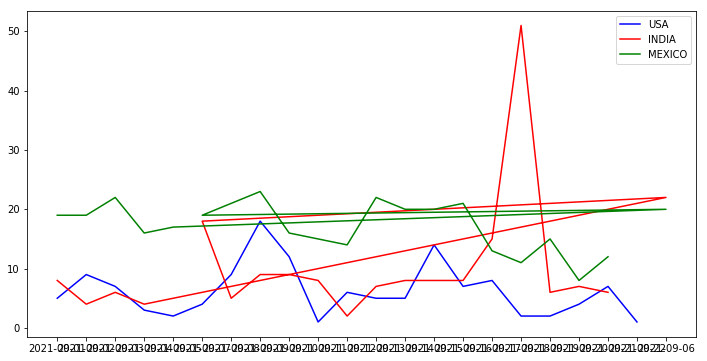

In [7]:
df_pois_vaccine['country'] = df_pois_vaccine.poi_name.apply(lambda _: poi_country_map[_])
df_pois_ct = df_pois_vaccine.groupby(by=['country', 'tweet_date']).size().reset_index(name='tweet_counts')

figure(figsize=(12, 6))
plot(df_pois_ct[df_pois_ct.country == 'USA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_date, df_pois_ct[df_pois_ct.country == 'USA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_counts, 'blue', label='USA')
plot(df_pois_ct[df_pois_ct.country == 'INDIA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_date, df_pois_ct[df_pois_ct.country == 'INDIA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_counts, 'red', label='INDIA')
plot(df_pois_ct[df_pois_ct.country == 'MEXICO'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_date, df_pois_ct[df_pois_ct.country == 'MEXICO'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_counts, 'green', label='MEXICO')
legend()


In [10]:
df_pois_ct.to_csv('data/df_pois_covid.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


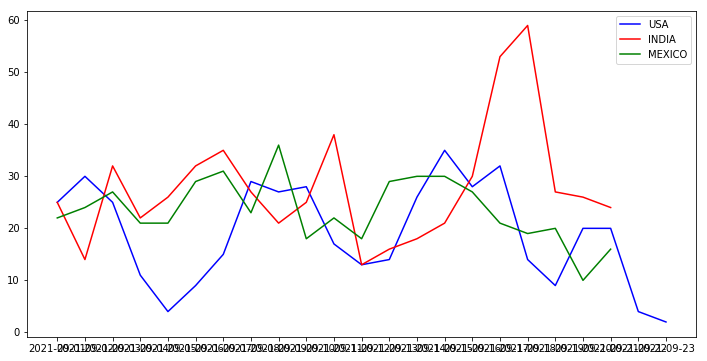

In [9]:
df_pois_covid['country'] = df_pois_covid.poi_name.apply(lambda _: poi_country_map[_])
df_pois_ct = df_pois_covid.groupby(by=['country', 'tweet_date']).size().reset_index(name='tweet_counts')

figure(figsize=(12, 6))
plot(df_pois_ct[df_pois_ct.country == 'USA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_date, df_pois_ct[df_pois_ct.country == 'USA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_counts, 'blue', label='USA')
plot(df_pois_ct[df_pois_ct.country == 'INDIA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_date, df_pois_ct[df_pois_ct.country == 'INDIA'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_counts, 'red', label='INDIA')
plot(df_pois_ct[df_pois_ct.country == 'MEXICO'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_date, df_pois_ct[df_pois_ct.country == 'MEXICO'][df_pois_ct.tweet_date >= '2021-09-01'].tweet_counts, 'green', label='MEXICO')
legend()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


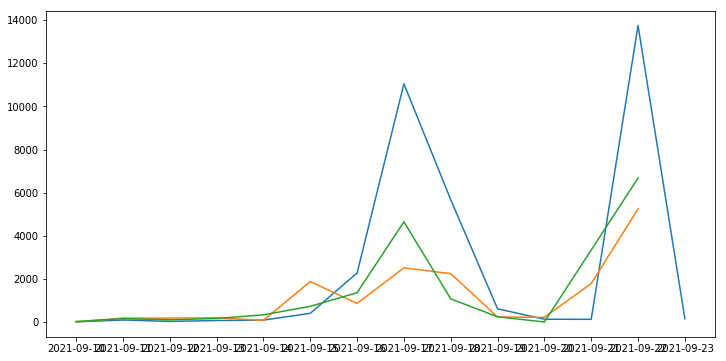

In [6]:
# Attitude
df_tweet_ct = df_general.groupby(by=['tweet_lang', 'tweet_date']).id.nunique().reset_index(name='tweet_count')
df_tweet_ct.sort_values(by=['tweet_lang', 'tweet_date'], ascending=True, inplace=True)
df_tweet_ct.index = range(len(df_tweet_ct))
df_tweet_ct.to_csv('data/df_general_tweet_ct.csv', index=False)

figure(figsize=(12, 6))
plot(df_tweet_ct[df_tweet_ct.tweet_lang == 'en'].tweet_date, df_tweet_ct[df_tweet_ct.tweet_lang == 'en'].tweet_count)
plot(df_tweet_ct[df_tweet_ct.tweet_lang == 'hi'].tweet_date, df_tweet_ct[df_tweet_ct.tweet_lang == 'hi'].tweet_count)
plot(df_tweet_ct[df_tweet_ct.tweet_lang == 'es'].tweet_date, df_tweet_ct[df_tweet_ct.tweet_lang == 'es'].tweet_count)


In [9]:
def get_hashtag_ct(hash_list):            
    hash_uniques = list(set(hash_list))
    count_list = list()
    
    for _ in hash_uniques:
        count_list.append(hash_list.count(_))
        
    d = pd.DataFrame({'hashtag': hash_uniques, 'hashtag_count': count_list})
    d.sort_values(by='hashtag_count', ascending=False, inplace=True)
    d.index = range(len(d))
    
    return d


def get_token_ct(token_list):            
    token_uniques = list(set(token_list))
    count_list = list()
    
    for _ in token_uniques:
        count_list.append(token_list.count(_))
        
    d = pd.DataFrame({'token': token_uniques, 'token_count': count_list})
    d.sort_values(by='token_count', ascending=False, inplace=True)
    d.index = range(len(d))
    d['cum_count'] = d.token_count.cumsum()
    #d = d[d.cum_count <= 50]
    
    return d[['token', 'token_count']]


def get_tokens(text_):
    return text_.split()

In [7]:
# Most used hashtags
df_hash_ct = df_general.groupby(by=['tweet_lang', 'tweet_date']).hashtags.sum().reset_index()
df_hash_ct.hashtags = df_hash_ct.hashtags.apply(lambda x: [_ for _ in x if _ != '#0'])
df_hash_ct = df_hash_ct.explode('hashtags')
df_hash_ct.dropna(subset=['hashtags'], axis=0, inplace=True)
df_hash_ct.hashtags = df_hash_ct.hashtags.apply(lambda _: _.lower())

# df_hash_ct_en = get_hashtag_ct(df_hash_ct[df_hash_ct.tweet_lang == 'en'].hashtags[0])
# df_hash_ct_hi = get_hashtag_ct(df_hash_ct[df_hash_ct.tweet_lang == 'hi'].hashtags[2])
# df_hash_ct_es = get_hashtag_ct(df_hash_ct[df_hash_ct.tweet_lang == 'es'].hashtags[1])

df_hash_ct.to_csv('data/df_hashtags.csv', index=False)

# Plot hashtag counts
# figure(figsize=(12, 6))
# bar(df_hash_ct_en.head(20).hashtag, df_hash_ct_en.head(20).hashtag_count)
# figure(figsize=(12, 6))
# bar(df_hash_ct_hi.head(20).hashtag, df_hash_ct_hi.head(20).hashtag_count)
# figure(figsize=(12, 6))
# bar(df_hash_ct_es.head(20).hashtag, df_hash_ct_es.head(20).hashtag_count)

In [10]:
# Most used kwds
df_general['tokens'] = df_general.text_en.apply(get_tokens)

df_token_ct = df_general.groupby(by=['tweet_lang', 'tweet_date']).tokens.sum().reset_index()

# df_token_ct_en = df_token_ct[df_token_ct.tweet_lang == 'en'].tokens.apply(get_token_ct)
# df_token_ct_hi = df_token_ct[df_token_ct.tweet_lang == 'hi'].tokens.apply(get_token_ct)
# df_token_ct_es = df_token_ct[df_token_ct.tweet_lang == 'es'].tokens.apply(get_token_ct)

# # Plot token counts
# bar(df_token_ct_en.token, df_token_ct_en.token_count)
# bar(df_token_ct_hi.token, df_token_ct_hi.token_count)
# bar(df_token_ct_es.token, df_token_ct_es.token_count)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
tokens_ = df_token_ct.tokens.sum()
tokens_ = [_.lower() for _ in tokens_]

In [31]:
unique_tokens = list(set(tokens_).difference(set(stop_words)))
unique_tokens = [_ for _ in unique_tokens if len(_) > 3]
count_list = list()
for _ in unique_tokens:
    count_list.append(tokens_.count(_))

In [32]:
df_token = pd.DataFrame({'token': unique_tokens, 'count_': count_list})

In [33]:
df_token.sort_values(by='count_', ascending=False, inplace=True)
df_token.index = range(len(df_token))

In [37]:
df_token['cumcount_perc'] = round(df_token.count_.cumsum()/df_token.count_.sum(), 4)*100

In [42]:
df_token[df_token.cumcount_perc >= 50]

token  count_  cumcount_perc
632         double     176          50.01
633        फ़ाइज़र     176          50.03
634         बेचारे     176          50.06
635         severe     175          50.08
636           jabs     175          50.10
...            ...     ...            ...
75780   dose2:5932       1         100.00
75781  cantaloupes       1         100.00
75782         wate       1         100.00
75783     म0!कोविड       1         100.00
75784     curtain.       1         100.00

[75153 rows x 3 columns]

In [47]:
df_token.head(500).to_csv('data/df_token_counts.csv', index=False)

In [51]:
df_token.head(500)

token  count_  cumcount_perc
0       vaccine   15261           1.97
1         covid   12799           3.62
2        vacuna    8212           4.68
3       वैक्सीन    7149           5.61
4        pfizer    6703           6.47
..          ...     ...            ...
495        बिना     215          46.62
496       blood     215          46.64
497  antibodies     214          46.67
498        full     214          46.70
499       tener     213          46.73

[500 rows x 3 columns]

In [50]:
df_token_ct = df_token_ct.explode('tokens')

In [53]:
df_token_ct = df_token_ct[df_token_ct.tokens.isin(list(df_token.head(500).token.values))]
df_token_ct.to_csv('data/df_tokens_datewiese.csv', index=False)

In [5]:
def get_sentiment_level(polarity_):
    if polarity_ <= -0.6:
        return 'strongly_negative'
    elif polarity_ <= -0.2:
        return 'moderately_negative'
    elif polarity_ <= 0.2:
        return 'neutral'
    elif polarity_ <= 0.6:
        return 'moderately_positive'
    else:
        return 'strongly_positive'

In [30]:
map_ = {'strongly_negative': 'Strongly Negative'.upper(), 'moderately_negative': 'Moderately Negative'.upper(),
    'neutral': 'Neutral'.upper(), 'moderately_positive': 'Moderately Positive'.upper(), 
        'strongly_positive': 'Strongly Positive'.upper()}

In [31]:
map_

{'strongly_negative': 'STRONGLY NEGATIVE',
 'moderately_negative': 'MODERATELY NEGATIVE',
 'neutral': 'NEUTRAL',
 'moderately_positive': 'MODERATELY POSITIVE',
 'strongly_positive': 'STRONGLY POSITIVE'}

In [22]:
df_eng['sentiment_level'] = df_eng.sentiment.apply(get_sentiment_level)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 5 artists>

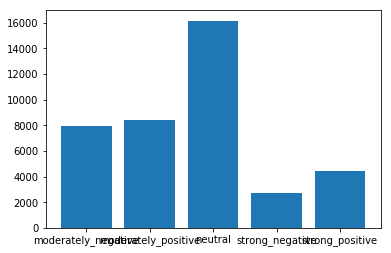

In [34]:
df_sent_ct = df_eng.groupby(by='sentiment_level').size().reset_index(name='count_')

# Plot sentiment level counts
bar(df_sent_ct.sentiment_level, df_sent_ct.count_)


In [15]:
# Read Vaccine files
f = open('IndiaVaccine.txt', 'r').read()
df_india_vaccines = pd.DataFrame(eval(f.replace('\n', ''))['data'][1:])
df_india_vaccines = df_india_vaccines[df_india_vaccines.date >= '2021-09-01'][df_india_vaccines.date <= '2021-09-30'][['date', 'daily_vaccinations']]
df_india_vaccines.to_csv('data/df_india_vaccines.csv', index=False)

f = open('USAVaccine.txt', 'r').read()
df_us_vaccines = pd.DataFrame(eval(f.replace('\n', ''))['data'][1:])
df_us_vaccines = df_us_vaccines[df_us_vaccines.date >= '2021-09-01'][df_us_vaccines.date <= '2021-09-30'][['date', 'daily_vaccinations']]
df_us_vaccines.to_csv('data/df_us_vaccines.csv', index=False)

f = open('MexicoVaccine.txt', 'r').read()
df_mex_vaccines = pd.DataFrame(eval(f.replace('\n', ''))['data'][1:])
df_mex_vaccines = df_mex_vaccines[df_mex_vaccines.date >= '2021-09-01'][df_mex_vaccines.date <= '2021-09-30'][['date', 'daily_vaccinations']]
df_mex_vaccines.to_csv('data/df_mex_vaccines.csv', index=False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


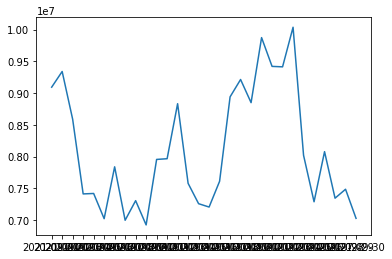

In [22]:
# Plot Vaccinations
figure(figsize=(12, 6))
plot(df_india_vaccines.date, df_india_vaccines.daily_vaccinations)
figure(figsize=(12, 6))
plot(df_us_vaccines.date, df_us_vaccines.daily_vaccinations)
figure(figsize=(12, 6))
plot(df_mex_vaccines.date, df_mex_vaccines.daily_vaccinations)

In [7]:
# Read Covid files
f = open('IndiaCovidCases.txt', 'r').read()
df_india_covid = pd.DataFrame(eval(f.replace('\n', '').replace('\t', '')))[['dateymd', 'dailyconfirmed', 'dailydeceased', 'dailyrecovered']]
df_india_covid.rename(columns={'dateymd': 'date'}, inplace=True)

f = open('USACovidCases.txt', 'r').read().replace('true', 'True').replace('false', 'False').replace('null', 'None')
f = '['+f+']'
f = eval(f)
f = [{'date': _['date'], 'newCases': _['newCases']} for _ in f]
df_us_covid = pd.DataFrame(f)

f = open('MexicoCovidCases.txt', 'r').read()
f = eval(f)
keys_ = list(f.keys())
values_ = list(f.values())
df_mex_covid = pd.DataFrame({'date': keys_, 'daily_cases': values_})
df_mex_covid['daily_cases'] = df_mex_covid.daily_cases - df_mex_covid.daily_cases.shift(1).fillna(0)
#df_mex_covid = df_mex_covid.tail(-1)
df_mex_covid['date'] = [(datetime.strptime('2021-09-02', '%Y-%m-%d').date()+timedelta(days=_)).__str__() for _ in range(29)]


ValueError: Length of values (29) does not match length of index (30)

In [10]:
df_india_covid

date dailyconfirmed dailydeceased dailyrecovered
0   2020-09-01          78168           892          62145
1   2020-09-02          82860           913          67874
2   2020-09-03          84156           979          67491
3   2020-09-04          87115           950          69625
4   2020-09-05          90600           916          73161
5   2020-09-06          91725          1005          69630
6   2020-09-07          75015          1129          74116
7   2020-09-08          89855          1107          74608
8   2020-09-09          95536          1168          73062
9   2020-09-10          96762          1213          70904
10  2020-09-11          97655          1202          81456
11  2020-09-12          94414          1111          77862
12  2020-09-13          93220          1140          77748
13  2020-09-14          81913          1054          79213
14  2020-09-15          91098          1281          82849
15  2020-09-16          97860          1140          82924
16  2020-09-17          96787          1175          87788
17  2020-09-18          92973          1221          95515
18  2020-09-19          92574          1149          94389
19  2020-09-20          87395          1135          92926
20  2020-09-21          74493          1056         102070
21  2020-09-22          83362          1085          89657
22  2020-09-23          86703          1123          87459
23  2020-09-24          85921          1144          81142
24  2020-09-25          85717          1093          93331
25  2020-09-26          88759          1124          92365
26  2020-09-27          82770          1040          74691
27  2020-09-28          69669           775          85198
28  2020-09-29          80500          1178          86150
29  2020-09-30          86748          1179          85274

In [8]:
f = open('MexicoCovidCases.txt', 'r').read()
f = eval(f)
keys_ = list(f.keys())
values_ = list(f.values())
df_mex_covid = pd.DataFrame({'date': keys_, 'daily_cases': values_})

In [9]:
df_mex_covid

date  daily_cases
0    9/1/21      3369747
1    9/2/21      3387885
2    9/3/21      3405294
3    9/4/21      3420880
4    9/5/21      3428384
5    9/6/21      3433511
6    9/7/21      3449295
7    9/8/21      3465171
8    9/9/21      3479999
9   9/10/21      3479999
10  9/11/21      3506743
11  9/12/21      3511882
12  9/13/21      3516043
13  9/14/21      3528972
14  9/15/21      3542189
15  9/16/21      3549229
16  9/17/21      3552983
17  9/18/21      3552983
18  9/19/21      3569677
19  9/20/21      3573044
20  9/21/21      3585565
21  9/22/21      3597168
22  9/23/21      3608976
23  9/24/21      3619115
24  9/25/21      3619115
25  9/26/21      3632800
26  9/27/21      3635807
27  9/28/21      3645599
28  9/29/21      3655395
29  9/30/21      3664223

In [4]:
df_india_covid.head()

date dailyconfirmed dailydeceased dailyrecovered
0  2020-09-01          78168           892          62145
1  2020-09-02          82860           913          67874
2  2020-09-03          84156           979          67491
3  2020-09-04          87115           950          69625
4  2020-09-05          90600           916          73161

In [5]:
df_us_covid.head(2)

date  newCases
0  2021-09-01    210995
1  2021-09-02    175696

In [6]:
df_mex_covid.head(2)

date  daily_cases
1  2021-09-02      18138.0
2  2021-09-03      17409.0

In [23]:
df_india_covid.to_csv('data/df_india_covid.csv', index=False)

In [24]:
df_us_covid.to_csv('data/df_us_covid.csv', index=False)

In [25]:
df_mex_covid.to_csv('data/df_mex_covid.csv', index=False)

In [6]:
# General tweets mentioning POIs
poi_list = list(poi_country_map.keys())
poi_list = ['@'+_ for _ in poi_list]

def get_mention_tag(mentions_):
    l = set(poi_list).intersection(set(mentions_))
    if l:
        return l
    else:
        return {0}

df_general_covid['mention_tag'] = df_general_covid.mentions.apply(get_mention_tag)
df_mention = df_general_covid[df_general_covid.mention_tag != {0}]
df_mention['country'] = df_mention.mention_tag.apply(lambda _: poi_country_map[list(_)[0].replace('@', '')])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df_mention.groupby(by=['country', 'tweet_date', 'sentiment_level']).size().reset_index(name='counts_').to_csv('df_poi_mentions.csv', index=False)


In [30]:
df_mention.sentiment_level.unique()

array(['NEUTRAL', 'MODERATELY POSITIVE', 'STRONGLY NEGATIVE',
       'STRONGLY POSITIVE', 'MODERATELY NEGATIVE', nan], dtype=object)

In [32]:
len(df_mention), len(df_mention.dropna(subset=['sentiment_level']))

(8718, 7876)

In [42]:
# Gather Disinformation

hesitancy_kwds = ['hesitancy', 'hesitant', 'disinformation', 'misinformation', 'conspiracy', 'trust',
                 'vacilación', 'desinformación', 'conspiración', 'confianza',
                 'संदेह', 'दुष्प्रचार', 'झूठी खबर', 'षड़यंत्र', 'विश्वास', 'अफवाह']

def get_hesitancy_flag(tweet):
    for _ in hesitancy_kwds:
        if _ in tweet.lower():
            return 1
    return 0

#df_general['hesitancy_flag'] = df_general.tweet_text.apply(get_hesitancy_flag)
df_pois_vaccine['hesitancy_flag'] = df_pois_vaccine.tweet_text.apply(get_hesitancy_flag)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
len(df_general), len(df_general[df_general.hesitancy_flag == 1])

(65575, 535)

In [43]:
df_pois_vaccine['flag'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_pois_vaccine.head(1)

verified                   id  \
3621      True  1426554372528300041   

                                             tweet_text mentions tweet_lang  \
3621  Addressing the Mandal meeting of Patsoi Mandal...     [@0]         en   

      tweet_date tweet_translation  sentiment sentiment_level hashtags  \
3621  2021-08-14               NaN        0.0         NEUTRAL     [#0]   

     tweet_emoticons                                            text_en  \
3621             [0]  Addressing the Mandal meeting of Patsoi Mandal...   

          poi_name  hesitancy_flag  flag  
3621  sambitswaraj               0     1

In [46]:
df_pois_vaccine.groupby(by=['tweet_lang', 'tweet_date', 'sentiment_level']).agg({'flag': 'sum', 'hesitancy_flag': 'sum'}).reset_index().rename(columns={'flag': 'total_tweets', 'hesitancy_flag': 'hesitancy_tweets'}).to_csv('data/df_pois_hesitancy.csv', index=False)


In [17]:
# Emoji Analysis
import demoji, re

emoticons_happy = list([
        ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
        ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
        '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
        'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
        '<3'
    ])
emoticons_sad = list([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
])
all_emoticons = emoticons_happy + emoticons_sad

#emojis = list(demoji.findall(text).keys())
# clean_text = demoji.replace(text, '')

# for emo in all_emoticons:
#     if emo in clean_text:
#         clean_text = clean_text.replace(emo, '')
#         emojis.append(emo)


In [21]:
for _ in df_general.tweet_emoticons:
    if _ != ['0']:
        print(_)

['👏', '😷']
['🔹', '💉']
['😎']
['🤣']
['👍', '❤']
['🤦🏻\u200d♂️']
['💉']
['😎']
['⭐']
['🙏🏻']
['xp']
['😒']
['8D']
['💉']
['👉']
['➡']
[':c']
['📢']
['👇']
['😩']
['😏']
['xp']
['📰', '💉', '4⃣', '8⃣']
['💉']
['📰']
['\U0001f99c']
['🔴']
['😥', '👍', '\U0001f970']
['🤷🏻\u200d♂️', 'xp']
['🤣']
['👇🏻', '💉']
['💉']
['💉']
['📰', '💉', '4⃣', '8⃣']
['🗣️']
['🤣']
['😔']
['\U0001f9a0']
['🔴']
['👉🏻']
['9⃣', '\U0001fa78', '⬆️', '👇']
['➖']
['💉', '4⃣', '8⃣', '➡', 'xp']
['💉', '4⃣', '8⃣', '➡', 'xp']
['💉', '4⃣', '8⃣', '➡', 'xp']
['💉', '4⃣', '8⃣', '➡', 'xp']
['👍']
['➡️']
['‼️']
['💉']
['👉']
['\U0001f970']
['xp']
['🐵', '🙉']
['🤷🏻\u200d♂️']
['👉']
['😷']
['😏', '💩']
['😑', 'xp']
['👇']
['XP']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['💉', '😷', '🇻🇪']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['💉', '😷', '🇻🇪']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['🌍', '🌏', '🇲🇽', '🌎', '🌐']
['\U0001f973']
['🇲🇽', '🇻🇪']
['‼️']
['❌', '📊']
['❌',

['😰', '🙏🏻']
['🤣']
['xp']
['👇']
['\U0001f9f5', '❌']
['📌']
['🤔']
['🇺🇸']
['🤰']
[':S']
['XD']
['xp']
['‼️']
['xp']
['👉', '💉']
['xp']
['🔴']
['🔴']
['😉']
['🤔']
['👍', '🤦🏼\u200d♀️']
['🔹']
['0️⃣']
['\U0001f92d']
['😐']
['🙄', '😔']
['😁', '🕯️', '🙏🏻', '🎉', '💉']
['🤡', 'xp']
['➡️', '💉']
['xp']
['\U0001f9d1\u200d🔬', '💉', '\U0001f9ea']
['💉']
['💉']
['💉']
['💉']
['😏']
['💉']
['😌']
['💃', '☝️']
['⬇️']
['xp']
['👌']
['💉']
['💉', '🇮🇳', '\U0001f9ec']
['xp']
['😭']
['😩']
['🤦\u200d♂️']
['🇨🇷']
['🇨🇷']
['🇨🇷']
['🇨🇷']
['🇨🇷']
['\U0001f929']
['☹️']
['📻']
['😬']
['🙄', '🤣']
['✅']
['xp']
['😃']
['🎉']
['\U0001f97a']
['📢']
['\U0001f92d']
['🤣']
['😎']
['😭']
['😭']
['😭']
['😭']
['💉']
['💉']
['👴🏻', '👵🏼', '🔍', '🏩', '💉']
['🤷🏻\u200d♂️']
['xp']
['👉', '💉']
['xp']
['😂']
['😉']
['😉']
['😉']
['😉']
['😉']
['😉']
['😉']
['😉']
['📌']
['\U0001f929']
['🤧']
['\U0001f7e3']
['🙂']
['💪']
['➡️', '🗣', '🔎']
['xp']
['😩', '\U0001f9f2', '😂']
['👀']
['🔴']
['😩']
['😩']
['xp']
['🙄']
['xp']
['➡️', 'xD']
['👇']
['💉']
['\U0001f9a0', '\U0001f973', '\U0001f92d', '💉']
['😭']
['🙄']

['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['😳']
['👇']
['😬']
['😅', '🤦🏻\u200d♂️']
['\U0001f972']
['🤒']
['🙁']
['\U0001f973']
['💉', '\U0001f9a0', '🇲🇽']
['👽']
['\U0001f974']
['\U0001f92d']
['\U0001f90d', '\U0001f97a']
['😡']
['🙏', '\U0001f97a']
['✅', '\U0001f970']
['💉']
[':(']
['\U0001f9f5']
['💉']
['💉']
['💉']
['💉']
['🔗', '👉🏼']
['👍']
['👉', '💉']
['💉']
['🏢']
['🔴', '🇺🇸']
['xp']
['🤣']
['💉']
['😩']
['🤣']
['👉', '🔴']
['\U0001f9d1🏻', '\U0001fa7a', '📲', '💉', '💻']
['🇲🇽', '🔴']
['🇲🇽', '🔴']
['✨', '🙏']
['💉']
['➡️', '4️⃣', '0️⃣', '7️⃣', '💉', '9️⃣']
['💃', '🎉']
['💖']
['🤗']
['🚨']
['🤣']
['🔵']
['🔵']
['🔹', 'xp']
['\U0001f7e2', '🗞️']
['\U0001f7e2', '🗞️']
['👉', '📌']
['😜', '💪']
['👇

['➡']
['🤔', '😑', '☹️', '\U0001f972']
['🔴', '📰']
['👉🏻', '\U0001f9d1🏻\u200d⚖️', '💉']
['🗞️']
['😪']
['🔵', '🌐']
['🗞']
['🗞']
['😭']
['🤔', '😑', '☹️', '\U0001f972']
['🗞']
['🤔', '😑', '☹️', '\U0001f972']
['🤔', '😑', '☹️', '\U0001f972']
['😭']
['🤔', '😑', '☹️', '\U0001f972']
['💀']
['😭']
['😭']
['👀']
['🤙🏼']
['😭']
['\U0001f90d', '💙']
['🤔', '😑', '☹️', '\U0001f972']
['😭']
['😎']
['📌', '🏥', '💉']
['😭']
['🇨🇺']
['😂']
['🇨🇺']
['🤔', '😑', '☹️', '\U0001f972']
['🤔', '😑', '☹️', '\U0001f972']
['😭']
['😭']
['😭']
['😭']
['😿']
['😭']
['😭']
['💉']
['🤧']
['😵']
['😛']
['😭']
['💉']
['📍']
['✋']
['xp']
['👇']
['⚠️', '🛑', '💀', '🚩']
['🌎']
['xp']
['👏']
['👀', '👦🏽', '👇🏽', '👧🏽', '💉']
['🇪🇸']
['🇪🇸']
['🇪🇸']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🔵', '🌐']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['☹️']
['✌🏽', '😔']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['🎙️']
['👉🏻', '\U0001f9d1🏻\u200d⚖️', '💉']
['🎙️']
['👉🏻', '\U0001f9d1🏻\u200d⚖️', '💉']
['😂']
['😥']
['🙃']
['😂']
['😹', '🙄']
['💭']
['💉']
['😎']
['🚶🏽\u200d♀️']
['👇', '✅', '🇨🇴', '💉']
['💔', '🙎🏻\u

[':3']
['😫']
['🚌', '🎓']
['✨']
['🤣', '🔥']
['xp']
['🙏']
['🇮🇳']
['💐']
['🙏']
['xp']
['🙏🏼']
['👇']
['🇮🇳', '🌐']
['📌', '❤']
['xp']
['💉', '🇮🇳', '🇳🇿']
['👋']
['➡️', '🎡']
['❗']
['xp']
['xp']
['👍']
['👏']
['\U0001f92f', '😲']
['🙌🏼']
['✅', '🤘🏼', '😉', '💉', '😒']
['🇮🇳']
['🇮🇳']
['🇮🇳']
['xp']
['🏒', '\U0001f94e', '💉', '🏈']
['xp']
['😅']
['👇🏾']
['😳']
['xp']
['👍🏽', '🤣']
['👍', '❤']
['👫', '🇨🇮', '😷', '👇']
['🙏']
['😄', '😂', '😃']
['😊']
['👏', '🙏']
['xp']
['▶️']
['\U0001f974', '🤡']
['🤣']
['xp']
['😰']
['xp']
['xp']
['🤞']
['🤐']
['🙏']
['👏🏻', '🇮🇳', '🇦🇺', '🙏🏻', '💉']
['\U0001f92e']
['💉']
['😡']
['👇']
['😡']
['🙏', '👌']
['\U0001f9a0', '⚕️', '💉']
['XP']
['👍']
['👍', '🙏']
['🤔']
['📢']
['🇮🇳']
['⚽', '💉']
['⚽', '💉']
['⚽', '💉']
['⚽', '💉']
['😐']
['🔒']
['🥁', '🎂', '🎻', '💉', '🎺']
['xp']
['xp']
['▪']
['xp']
['☹️']
['👏', '👍']
['🇮🇳']
['🙏', '😇', '🔥', '🇮🇳', '😮', '👏', '🎉', '💙']
['🤦🏼\u200d♂️', '🤷🏼\u200d♂️']
['xp']
['xD']
['👶', '🇺🇸', '👴', '✌', '🆗', '❤', '👵', '👱', '👧', '💉', '😷', '👩', '🆒', '👨']
['xp']
['🤣']
['xp']
['👇🏾', '🔗']
['xp']
['🤦🏼\u200d♂️']
[

['👇🏻', '💉', '🤔']
['👋🏽', '🙋🏽\u200d♀️', '😷']
['xp']
['xp']
['🙏🏻']
['🤣', 'xp']
['➖', '➕']
['📻', '🗓']
['👇']
['xp']
['👀', '🤔']
['xp']
['xp']
['🤣']
['XP']
['✅', '❌']
['xp']
['💉', '💀', '🤦\u200d♂️']
['🇮🇳', '👏']
['xp']
['🔺']
['😱']
['🚮', '💩', '👇', '🚬', '😏']
['xp']
['xp']
['📍', '⏰']
['🤡']
['✅']
['XP']
['💉']
['xp']
['😂']
['xD']
['💉', '➡']
['💉', '🇵🇭']
['😆']
['✅', '👉🏽']
['🤒', '⚠️', '🏥', '🇩🇪', '🆚', '✝️']
['👇', 'xp']
['xp']
['✅']
['🤔', '🤷🏻\u200d♀️']
['💉']
['👏🏽']
['xp']
['😁', '💉']
['XD']
['xp']
['💉', '📍', '📅']
['xp']
['⬆️', 'xp']
['✔']
['💉', '📍', '📅']
['👇']
['💉', '📍', '📅', ':3']
['😉', '😆', 'xp']
['8)']
['🤔']
['🤒', '🍕', '⚠️', '🏥', '🇮🇹', '💉', '🆚', '✝️']
['xp']
['\U0001f92d', '🤧']
['💉']
['🎃']
['xp']
[':)', 'xp']
['💉', '📍', '📅', ':3']
['😅']
['😞', '🤷\u200d♀️']
['\U0001f974', '🤔']
['👇', '8)']
['xp']
['xp']
['xp']
['☑️', '💉', '😏', '👥', '\U0001f92a']
['XP']
['📣', '2️⃣', '1️⃣']
['🤦🏽\u200d♂️']
['xp']
['🤣']
['xp']
['💰']
['‼️']
['💉']
['\U0001f973']
['👀', '‼️']
['xp']
['xp']
['👍🏼']
['✈️', '🇦🇬', '🚦', '🇬🇧']
['\U0001f

['✍️', '3️⃣', '4️⃣', '💉']
['▶', '🛑']
['📣']
['💉']
['xp']
['🇫🇷', '🔴']
['✊']
['xp']
['📣']
['🚨', 'xp']
['💉', '🔴']
['💉', '🔴']
['💉', '🔴']
['xp']
['xp']
['💉']
['📰', '📌', '🍕', '👇', '💉', '👟']
['💉', '🇫🇷']
['xp']
['👉', '📸', '📱']
['💉', '🚨']
['👧🏽', '🙋']
['xp']
['💉']
['🚨']
['👇']
['😅']
['🗺', '💉', '🇩🇪']
['xp']
['💉']
['xp']
['📢', '💉']
['👉', '📍']
['xp']
['xp']
['xp']
['\U0001f92e']
['xp']
['xp']
['xp']
['⭕']
['⭕']
['⭕']
['⭕']
['😳', '\U0001f92f', '🙈']
['🤓', '☝️']
['🤓', '☝️']
['🤓', '☝️']
['🙄']
['xp']
['xp']
['xp']
['xp']
['xp']
['xp']
['xp']
['xp']
['xp']
['xp']
['xp']
['👉🏻']
['💉', '📱']
['💉', '📱']
['💪', '🛩']
['📦', '🛬']
['📦', '🛬']
['😁', '😂', '👏', '❤', '💪']
['xp']
['xD']
['💉', '🤢', '😡']
['💉', '🔴']
['🇨🇺']
['💉']
['xp']
['xp']
['xp']
['xp']
['😂', 'xp']
['👇', 'xp']
['xp']
['👇🏼', 'xp']
['📻', '🎙️']
['🙄', '🤔']
['🙃']
['xp']
['😅']
['💉']
['💉']
['💉', '😷']
['🇨🇺']
['2️⃣', '3️⃣', '1️⃣']
['📰', '📖']
['💉', 'xp']
['xp']
['😎', '👌']
['🤦🏼\u200d♀️']
['xp']
['🗺️']
['\U0001f7e2']
['😡']
['💉', '☠', '👹']
['xp']
['😄', '😁', '😂', '😅', '

['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['🤣']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['👉']
['😁']
['🎉']
['😡']
['👇']
['💪']
['🤐', '🤔']
['🤣']
['🙏']
['🤔']
['🙏']
['🇮🇳', '🙏🏻']
['🤣', '😂']
['💐', '🎂', '💗', '🇮🇳', '\U0001f973', '🌹', 'XP']
['XP']
['💉']
['🤔', '🤣']
['🙏']
['😎']
['😢']
['😢']
['🙏']
['🙏', '💐']
['🙏']
['🙏']
['🙏', '💐']
['👎', '😜', '👌', '✌️']
['💐', '🇮🇳']
['🙄']
['🙏']
['😤', '\U0001f974']
['❤️']
['🙏']
['💐']
['👌']
['😢']
['😁']
['🔴']
['😅']
['💐']
['😡', '😱']
['😡', '😱']
['😡', '🙏', '😠']
['😂']
['😡', '😱']
['xD']
['🤔']
['😀']
['🌹']
['😭']
['😀']
['👇']
['👣']
['👇']
['👇']
['👇']
['👇']
['👍']
['🙏']
['💐', '💦', '🌾', '🙏', '🌱', '🌻', '🍁', '🌿', '🌹', '🌷']
['💐', '💦', '🙏', '🌱', '🌻', 

['🤷\u200d♀️']
['🤷\u200d♀️']
[':p']
['😘']
['🎤']
['😉']
['💔']
['🐱', '‼️', '💟']
['😍']
['\U0001f928']
['😔']
['😒']
['xp']
['😭']
['🎶']
['\U0001f928']
[':)']
['😂']
['xD']
['🚮']
['🤜🏻', '😾']
['xp']
['😌']
['🤣']
['😁']
['xp']
[':(']
['xp']
['💜', '💛']
['😮']
['💉']
['ℹ️', '🔬']
['xp']
['xp']
['xp']
['xp']
['💯', '\U0001f976', '💀', '😮\u200d💨']
['😵\u200d💫']
['😭']
['🏷️', '📆', '💵', '🚚']
['😭']
[':D']
['😉']
['💔']
['xp']
['👀']
['😩', '😚', '💗', '✊🏻']
['xp']
['\U0001f976', '💀', '\U0001f928', '😈', '💯']
['😹', '🔫', '\U0001f9d0']
['xp']
['xp']
['xp']
['xp']
['🙄', '🤦🏼\u200d♀️']
['🤷\u200d♂️']
['😱']
['xp', 'XP']
['xp']
['❤️']
['☹️']
['❤️']
['❤️']
['❤️']
['💗', '😭']
['💘', '💖', '💞', '💗', '💕', ':(']
['xp']
['xp']
['😊']
['😯']
['😵\u200d💫', '🤢', '🥊']
['😭']
['😞', '😭']
['😍', '\U0001f90d']
['🤦🏾\u200d♂️']
['😒']
['💚', ':)']
['🤣']
['🎶', '😂']
['🙏🏾']
['💜', '💛']
['🔥']
['🙁']
[':(']
['🇯🇵', '🇫🇷', '🇺🇸', '🤢', '💀', '🇩🇪', '💉', '🇬🇧']
['✅', '🇲🇾', '✨']
['XD']
['💙', '😋', '😗']
['🙌🏾']
['🙌']
['🤣']
['💥', '🌞']
['🔴']
['❤️', '😍']
['🙄']
['😥', '😭', '🙏', '

['💉']
['😉', '😂']
['🙏']
['😂']
['🙋', '🙏']
['😇']
['😇']
['🇮🇳', '🤣']
['👇', '😯']
['🆓']
['👍']
['🤣']
['😂']
['🙄', '🤷', '🤔', '\U0001f92b', ':3']
['😊', '🤔']
['🚩', '🙏']
['😂', '😁']
['🤔']
['💠']
['😍', '👍', '🙏', '👌']
['❓', '🔸']
['😂', '🤣']
['😂', '🤣']
['😂', '🤣']
['😊', '😁', '🤔', '😄']
['\U0001f92a']
['🕋']
['👇']
['🤣']
['😁']
['🙄']
['😂']
['😷', '✅', '\U0001f9f4', '📍']
['🙄', '😫']
['🤔']
['🤣']
['🇮🇳', '🙏', '🚩']
['😉', '😀', '😅', '😂']
['🌸', '🇮🇳', '🙏']
['😀', '😁']
['😀', '😁']
['💯', '🔭', '😷', '📜', '🇮🇳', '🛏', '🤔', '🕸', '🎩', '💉', '📑']
['😊']
['🤣']
['💐', '👏']
['🤦']
['😷', '\U0001f9fc', '🙏', '💉', '🗞']
['😷', '\U0001f9fc', '🙏', '💉', '🗞']
['😷', '\U0001f9fc', '🙏', '💉', '🗞']
['😷', '\U0001f9fc', '🙏', '💉', '🗞']
['😷', '\U0001f9fc', '🙏', '💉', '🗞']
['😷', '\U0001f9fc', '🙏', '💉', '🗞']
['😜', '😂']
['😊', '👍']
['🇮🇳']
['🇮🇳']
['🇮🇳']
['🇮🇳']
['😛']
['🙏']
['😂']
['✍️', '©️']
['🇮🇳', '🙏', '🚩']
['😂']
['😉']
['😀']
['➡️', '🙌🏻', '🔴']
['🇮🇳']
['😊', '✌️']
['😊', '✌️']
['😊', '✌️']
['😊', '✌️']
['😊', '✌️']
['😊', '✌️']
['🇮🇳']
['🤣']
['😊', '✌️']
['❣️', '😊', '👉', '✌

[':3']
['😊']
['👋']
['👍']
['xp']
['🎁']
['xp']
[':3']
['😂']
['❤️']
['💉', '👏']
['🤧']
['😡']
['🤷']
['🏠', '✉️', '👰']
['xp']
['🇨🇦']
['🦉', '🔥']
['🙏']
['❤️']
['⌛', '👨🏻\u200d🔬', '🔬', '\U0001f9ea']
['🤷🏻\u200d♀️']
['🙄']
['🇮🇩', '🇷🇺']
['💉']
['☺️', '🌄', '☕', '❤️', '👋', '▶️', '🔥', '🌻']
['☺️', '🌄', '👋', '☕', '▶️', '🔥', '🌻', '🙏']
['😡']
['xp']
['xp']
['📞']
['👏🏻', '💪🏻', '8)']
['xp']
['xp']
['xp']
['xp']
['👍', '😀']
['xp']
['🦋', '🙏', '🤦\u200d♂️']
['🤣']
['🔙', '🏦']
['💀', '❤️', '🇺🇸', '🔥', '💴']
['👃']
['😂']
['😩']
['🤣']
['🤡']
['💉']
['💉']
['😴']
['😊']
['💉']
['👇']
['\U0001f972']
['💉']
['💉', '😷']
['👇', '8D']
['xp']
['xp']
['xp']
['💥', '🇫🇷', 'xp']
['💥', '🇫🇷', 'xp']
['💥', '🇫🇷', 'xp']
['💥', '🇫🇷', 'xp']
['💉']
['\U0001f9e0']
['xp']
['👇']
['🔴']
['💉']
['📻', '🎙']
['👉']
['😷']
['XP']
['💉']
['📻', '🎙']
['📻', '🎙']
['💉', '🇬🇹']
['🤣']
['💉']
['‼️']
['🤷🏻\u200d♂️']
['🔵', '🔴']
['xp']
['👇']
['🔗', '😷']
['💉']
['😒']
['👉', '🛑']
[':3']
['🔴']
['💉']
['xp']
['👉', '⚠️']
['👇🏻']
['👉']
['💉', 'xp']
['🇻🇪']
['👇', '🔴']
['💉', '\U0001f9a0']
['☠️', '😱', '💀

['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🌞', '🌿', '🙏', '🌷', '🌺', '🔔', '⛳']
['🌞', '🌿', '🙏', '🌷', '🌺', '🔔', '⛳']
['😁']
['❤️', '🙏', '🌻', '🌺', '🚩']
['❤️', '🙏', '🌻', '🌺', '🚩']
['🎂']
['💐', '🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🌞', '🌿', '🙏', '🌹', '🔔', '⛳', '🚩']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['🚩', '🙏', '🇮🇳']
['🎂']
['🎂']
['🎂']
['🎂']
['💐', '😇']
['🎂']
['🎂']
['🎂', 'XD']
['🔹', '🎂']
['🎂']
['🎂']
['🎂']
['🎂']
['😔', '🙏']
['🙏', '🌻', '🌷', '🌹', '🌺', '🚩']
['👉🏻']
['😎', '\U0001f929']
['🎂']
['💐', '❤️', '🎂', '😐', '🤷🏻\u200d♂️', '😬', '🙏🏻', '😠']
['👉🏻']
['💐', '🤗']
['🔹']
['🎂']
['🙏']
['🎂']
['🚩', '🙏', '🇮🇳']
['😷']
['👇']
['🙏']
['🙏']
['🤔', '😑']
['\U0001fa94']
['🙏']
['🤗', '❤️', '🙏', '🚩', '💐']
['🙏']
['🙏', '✍️']
['❤️', '🤔', '🇺🇸', '✌️']
['xp']
['💰']
['\U0001f9a0', '💉']
['❤']
['🙏']
['xp']
['😂']
['🐴']
[':P']
['\U0001f971']
['🙄']
['🤦\u200d♀️']
['\U0001f9e0']
['xp']
['👉']
['🇷🇺', '💉']
['✌🏽']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']
['👿', '🤑']

In [20]:
with open('tweets.pickle', 'rb') as f:
    l = pickle.load(f)
    
l = [_ for _ in l if _['tweet_lang'] == 'en']

with open('tweets_sent_hi.pickle', 'rb') as f:
    l1 = pickle.load(f)
    
with open('tweets_sent_es.pickle', 'rb') as f:
    l2 = pickle.load(f)
    
l1 = [_ for _ in l1 if _['tweet_lang'] == 'hi']
l2 = [_ for _ in l2 if _['tweet_lang'] == 'es']

with open('tweets_updated.pickle', 'wb') as f:
    pickle.dump(l+l1+l2, f, protocol=pickle.HIGHEST_PROTOCOL)
    
l = l+l1+l2
for _, d in enumerate(l):
    if 'sentiment_level' in list(d.keys()):
        l[_]['sentiment_level'] = map_[d['sentiment_level']]

['0']

In [5]:
from nltk.corpus import stopwords

STOPWORDS = list(set(stopwords.words('english')))

In [73]:
d = pd.read_csv('df_topic_scores.csv')
d.topic_scores = d.topic_scores.apply(eval)
d.dropna(subset=['tweet_translation'], axis=0, inplace=True)

d['topic'] = d.topic_scores.apply(lambda _: np.argmax(_)+1)
d['topic_score'] = d.topic_scores.apply(lambda _: max(_))

In [74]:
d['token'] = d.tweet_translation.apply(lambda _: _.split())


In [39]:
topic_map = {1: 'CURRENT AFFAIRS', 2: 'COVID-19 GENERAL', 3: 'COVID-19 VACCINE'}

In [75]:
d.topic = d.topic.apply(lambda _: topic_map[_])

In [78]:
d.groupby(by='topic').size().reset_index(name='counts_').to_csv('data/df_topic_doc_count.csv', index=False)

In [42]:
len(d), len(d[d.tweet_translation.isna()])

(123266, 0)

In [43]:
len(d), d.id.nunique()

(123266, 123266)

In [44]:
d.id = d.id.astype('int')

ids_ = list(d.id.values)
topics_ = list(d.topic.values)
topic_scores = list(d.topic_score.values)

dict_ = dict()
for _, id_ in enumerate(ids_):
    dict_[id_] = {'topic': topics_[_], 'topic_score': topic_scores[_]}

In [47]:
with open('tweets_updated.pickle', 'rb') as f:
    l = pickle.load(f)

In [60]:
l_new = list()

for d in l:
    d['id'] = int(d['id'])
    try:
        d['topic'] = dict_[d['id']]['topic']
        d['topic_score'] = dict_[d['id']]['topic_score']
        l_new.append(d)
    except Exception as e:
        pass
        
print(len(l_new))

123266


In [67]:
[_ for _ in l_new if 'topic_score' not in list(_.keys())]

[]

In [70]:
len(l_new), len(set([_['id'] for _ in l_new]))

(123266, 123266)

In [71]:
with open('tweets_updated.pickle', 'wb') as f:
    pickle.dump(l_new, f, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
l_new[0]

{'poi_name': 'JoeBiden',
 'poi_id': 939091,
 'country': 'USA',
 'verified': True,
 'id': 1439607728016609286,
 'tweet_text': "Past presidents have cut taxes for the wealthy and biggest corporations with the promise of economic growth.\n\nIt doesn't work.\n\nThe ultra-wealthy and corporations must pay their fair share—which will lower costs for the middle class.",
 'hashtags': [],
 'mentions': [],
 'tweet_urls': [],
 'tweet_lang': 'en',
 'tweet_emoticons': [],
 'text_en': "Past presidents have cut taxes for the wealthy and biggest corporations with the promise of economic growth.It doesn't work.The ultra-wealthy and corporations must pay their fair sharewhich will lower costs for the middle class.",
 'tweet_date': '2021-09-19T15:00:00Z',
 'sentiment': 0.34,
 'sentiment_level': 'MODERATELY POSITIVE',
 'tweet_translation': "Past presidents have cut taxes for the wealthy and biggest corporations with the promise of economic growth.It doesn't work.The ultra-wealthy and corporations must pay

In [62]:
len(l_new), len(l)

(123266, 123408)

In [9]:
df_group = d.groupby(by='topic').token.sum().reset_index(name='token')
print('done1')
df_group.token = df_group.token.apply(lambda x: [_.lower() for _ in x if _.lower() not in STOPWORDS and len(_) > 3])


done1


In [25]:
df_group

topic                                              token
0      1  [past, presidents, taxes, wealthy, biggest, co...
1      2  [republican, governors, states, like, texas, f...
2      3  [virtually, covid, deaths, hospitalizations, u...

In [12]:
words1 = df_group.token[0]
words2 = df_group.token[1]
words3 = df_group.token[2]

In [14]:
words1_unique = list(set(words1))
count_1 = list()
for _ in words1_unique:
    count_1.append(words1.count(_))

d1 = pd.DataFrame({'token': words1_unique, 'counts_': count_1})
d1.sort_values(by='counts_', ascending=False, inplace=True)
d1.index = range(len(d1))

In [30]:
d1['topic'] = 1
d2['topic'] = 2
d3['topic'] = 3

df_ = pd.concat([d1.head(500),d2.head(500),d3.head(500)], ignore_index=True, axis=0, sort=True)
print(df_)
df_.head(500).to_csv('data/df_all_topic_words.csv', index=False)
# d1.head(500).to_csv('data/df_topic1_words.csv', index=False)
# d2.head(500).to_csv('data/df_topic2_words.csv', index=False)
# d3.head(500).to_csv('data/df_topic3_words.csv', index=False)


      counts_      token  topic
0        3612     pfizer      1
1        3553     people      1
2        2731   congress      1
3        2367      stock      1
4        2267      owned      1
...       ...        ...    ...
1495      180       plan      3
1496      180  community      3
1497      180       hear      3
1498      180      mask.      3
1499      179     latest      3

[1500 rows x 3 columns]


In [53]:
len(d)

10

In [22]:
words2_unique = list(set(words2))
count_2 = list()
for _ in words2_unique:
    count_2.append(words2.count(_))

d2 = pd.DataFrame({'token': words2_unique, 'counts_': count_2})
d2.sort_values(by='counts_', ascending=False, inplace=True)
d2.index = range(len(d2))

words3_unique = list(set(words3))
count_3 = list()
for _ in words3_unique:
    count_3.append(words3.count(_))

d3 = pd.DataFrame({'token': words3_unique, 'counts_': count_3})
d3.sort_values(by='counts_', ascending=False, inplace=True)
d3.index = range(len(d3))

In [23]:
d2.head(200).token.unique()

array(['vaccine', 'covid', 'vaccination', 'dose', 'prime', 'pfizer',
       'vaccines', 'mandate', 'second', 'campaign', 'minister',
       'minister,', 'respected', 'million', 'guidance', 'state', 'first',
       'vaccinated', 'doses', 'employees', 'flynn', 'people', 'today',
       'united', 'going', 'anti', 'breaking', 'salad', 'dressing',
       'biden', 'largest', 'company', 'shri', 'health', 'deep',
       'airlines', 'mike', 'corona', 'government', "world's", 'news',
       'narendra', 'modi', 'booster', 'kovid', 'said', 'general',
       'birthday', 'putting', 'mandates', 'take', 'leadership', 'know',
       'democrats', 'president', 'received', 'says', 'dosage', 'good',
       'india', 'mask', 'covid19', 'hospital', 'covid-19', 'september',
       'trial', 'doctors', 'medical', 'students', 'michael', '2009',
       'surgeon', 'bribing', 'suppressing', 'adverse', 'better',
       'require', 'shot', 'also', 'sued', 'plotting', '&amp;', 'resul',
       'public', 'desantis', 'stat

In [24]:
d3.head(200).token.unique()

array(['vaccine', 'covid', 'pfizer', 'people', 'vaccines', 'vaccination',
       'vaccinated', 'india', 'need', 'today', 'side', 'take', 'dose',
       'doses', 'like', 'million', 'know', 'moderna', 'health', 'also',
       'would', 'booster', 'still', 'data', 'even', 'covid19', 'effects',
       'immunity', '&amp;', 'covid-19', 'continue', 'country', 'many',
       'announced', 'time', 'want', 'getting', 'please', 'make', 'less',
       'cases', 'says', 'vaccine,', 'world', 'stop', 'fight', 'crore',
       'home', 'dosage', 'shot', 'government', 'every', 'study',
       'vaccine.', 'effect', 'good', 'shots', 'efficacy', 'first', 'last',
       'children', 'said', 'already', 'months', 'another', 'protect',
       'days', 'sinovac', 'risk', 'help', 'mask', 'fully', 'record',
       'biden', 'september', 'effective', 'long', 'corona', 'safe',
       'think', 'efforts', 'since', 'effectiveness', 'made', 'countries',
       'johnson', 'virus', 'right', 'natural', 'increasing', 'half',
    

In [32]:
d1.head(200).token.unique()

array(['pfizer', 'people', 'congress', 'stock', 'owned', 'surprised',
       'vaccine', 'india', 'president', 'today', 'work', 'whose', 'like',
       'modi', 'covid', 'many', 'american', 'country', 'thank', 'great',
       'every', 'global', 'make', 'delhi', 'help', 'health', 'support',
       'time', 'government', 'family', 'death', 'good', 'vaccination',
       'hidden', 'want', 'billion', 'world', 'jobs', 'minister',
       'company', 'first', 'congratulations', 'election', 'best', 'back',
       'market', 'americans', 'indigenous', 'america', 'free', 'profit',
       'much', 'women', 'also', 'need', 'going', 'working', 'dollar',
       'dose', 'vote', 'give', 'epidemic,', 'plan', 'must', 'know',
       'nation', 'state', 'biden', 'prime', 'happy', 'national', 'given',
       'project', 'years', 'made', 'justice', 'right', 'life',
       'covishield', 'would', 'slots', 'better', 'take', 'families',
       'care', 'continue', 'always', 'shri', 'doses', 'birthday',
       'forward', 

In [38]:
for _ in d[d.topic == 3].tweet_translation:
    print(_)
    print('==================')

Virtually all of the COVID deaths and hospitalizations are from unvaccinated people. Get your shot.
Vaccines are free, safe, and convenient.
: We never forget.We never forget the children who have grown up without parents. Parents who have suffered without children. Hu
Twenty years ago, nearly lives were cut short by an unspeakable act of cowardice and hatred on /11. As a nation, we must never forget those we lost during one of the darkest moments in our history and the enduring pain of their families and loved ones.
Our new COVID-19 plan will reduce the number of unvaccinated Americans, decrease hospitalizations and deaths, allow our children to go to schools safely, and keep our economy strong by keeping businesses open. We will spare no effort in saving lives and beating this virus.
My first responsibility is to protect the American people and make sure we have vaccines for every American, including enough boosters. As soon as they're authorized, those eligible will be able to get a

With Millions of Adults Studied worldwide, Our Journey to Create History Investing in Moderna $MRNA $PFE $CMG $NVDA $CROX $QQQ $SPY $CAR $CRM $AMZN $AAPL $NFLX $NET
This was always going to happen. Different tiers. Pfizer and Moderna ahead of Astrazeneca and J&amp;J (even though these vaccines actually provide better long term protection).Some vaccines are more equal than others.
I'm not opposed to monoclonal antibodies for treating COVID if it keeps the unvaccinated from clogging up the hospitals. Pfizer vaccine costs taayers $20 per dose, Moderna $37 per dose.MAB cost taayers $2,100 per dose!Is it too much to ask to have unvaxxed defray the cost?
Im a moderna vaccine citizen Those of you vaccinated with Astra...
Both my spouse and I had ours without any side effects. (If it makes a difference, the nd dose of Moderna wasnt quite so easy for me.)
WHO-backed vaccine hub for Africa to copy Moderna COVID-19 shot -
New VAERS Data as of Sept , :CVD inoculations15,432 Deaths and Adverse Even

| National drive off peak levels, but pace remains highRead full report by here
sites conducting vaccination today. That's another new!!Already lakhs done at am
One humble reminder: Only % adult Indians are fully immunized against coronavirus yet. This is % lesser than the global average. So while we are doing better in terms of escalating the pace of , we need to gather full speed possible, NOW.
UK government wont recognise vaccines administered in India. This means home quarantine with PCR test even if we are twice jabbed with the same vaccine as used in the UK. Discrimination?
I read that a woman mos preg got vaccinated and then her newborn was born with antibodies. How long they last I don't know.
RCHO sabarkantha announcing for at himatnagar Bus Depo.
to step down as T20 captain after World CupHimachal Pradesh leads the country, as pace maintains momentumRead more in today's Hindustan Times print edition Subscribe here
Check This Scientist and his Validated gathered International 

Moderna's vaccine is the most effective, but Pfizer and J&amp;J also protect well, CDC-led study says
vaccine is the most effective, but and &amp;J also protect well, -led study says
Moderna's vaccine is the most effective, but Pfizer and J&amp;J also protect well, CDC-led study says
If her cousins friend became impotent and his testicles became swollen it would happen to multiple men and they would halt administering the vaccine to people. Just as they did with the J&amp;J vaccine when they found a connection with a heart condition in older women.
You seriously have issues with that? How many people have you heard about getting covid, recovering from it, and then getting it again AND dying from it? Personally i haven't heard of any. So if i already have had covid why would i take a vaccine that MIGHT hurt me?
Moderna's vaccine is the most effective, but Pfizer and J&amp;J also protect well, CDC-led study says - CNN
: Moderna's vaccine is the most effective, but Pfizer and J&amp;J also

Not yet for those persons who received the J&amp;J vaccine.
Most anyone over doesn't have a Varicella because they actually got chicken pox as a kid before there was a vaccine. It should read "immune"
Ok, the renaming of the Pfizer vaccine sounds more like Moriartys poorer brother. Any other Sherlock fans out there do a double take?? Also, please do the right thing for yourself, your community and those that you love and get vaccinated
latest: Iran approves American J&amp;J Covid shot as fifth wave spreadsIrans new government has approved the Covid-19 vaccine developed by US firm Johnson &amp;amp; Johnson, a senior official said on Thursday, as the Islamic Republic faces a fifth wave of infections.
Kinda bummed the CDC is saying J &amp; J vaccine folks should wait it out and stick with the same vax for the booster. Was hoping to switch to mRNA.
And using said stolen SSN, they can get the vaccine for free. Wait until you find out that people from other countries have legally visited her

They would prolly start Johnson because of familiarity is my assumption. Unless Norman just outshining him in practice.
Sorry It's D. Johnson Pitt wr
Live music is back at ! Kudos to Albert Johnson on a stunning performance in Keans beautiful Enlow Hall!! We were also fortunate to have a special appearance by Kean's new Provost and Senior VPAA Dr. David Birdsell.
Nelson Velazquez Ivan Johnson Alexander Suarez Maikel Garcia Brandon Howlett Nick Decker Joey Ortiz Zach Watson cont...
really outdid themselves by casting Emily Blunt and Dwayne Johnson together in a movie /10 recommend the Jungle Cruise
The Nissan Super Girl Surf Pro QS fired into opening day action with some jaw-dropping performances - including standout Bettylou Sakura Johnson! Check out the full recap at Photo: WSL/Steinmetz
Dont get the vaccines they are harming and killing people. The bishop of Cleveland said Catholics cant get the Johnson and Johnson one. The Johnson and Johnson one used aborted fetal cells in the maki

She is telling the world that Sinovac vaccine is not working!
Another consignment of one million Sinopharm and three million Sinovac doses reached Pakistan on Wednesday, according to the National Disaster Management Authority
Vaccines used globallySinovac (contd.): TN TR UA UY ZW
Vaccines used globallySinovac: AL AM AZ BJ BA BR BW CL CN CO CY DJ DO EC EG GE HK ID KH LA LY MX MK MM MY OM PK PH PY SD SG SV SO SY TH TJ TL
Sinovac and the Delta Strain Which is The Best Mask To Use for Added Pr... via
I remember her let me finish at BBC.Now Sinovac is finished inside her.
Covid-19: Hong Kong lawmaker Regina Ip gets BioNTech jab after no antibodies detected from Sinovac vaccines
Of course. SinoVac is water
Sinovac is not recognised by most the world and is one that is needed topping up the most why get the vaccine if your not worried about covid and merely only want the vaccine to return to normal which I guess is majority of people now.
it's the sinovac inactivated virus one.. generally muc

Itna math aapko aata hai kya Tejashwi babu?why not you compare last days figures of these states with previous week average or last month average? Yday was special drive which so may states are doing..like Tamilnadu did special drive on th September with Lcas vaccination
You're fool the vaccination drive in China started this year only -6 month earlier than India
We vaccinated Mn people in a single day, which is a shade under the entire population of Australia shows the magnanimous scale of Indias vaccination drive !
Wow...you need to have extremely low IQ and be devoid of common sense to compare Covid vaccination drive with Polio vaccination drive.
The medical community: front-line nurses, he estimates vaccination rates hover around %.
Common sense lacks among some people ...jus to defame the facts some pappu followers go with percentage ratios ... considering numbers will eose people ..india being second largest populated country in the world is among best countries performing vaccin

: Americans a day are dying from COVID-19 despite the availability of vaccines that can prevent nearly all deaths
: Achieved at :08 PM.2 Crore Vaccines Administered So Far, Today.
Literally, hpv has , meningitis had , like all these vaccines we take have boosters
: The Netherlands has fallen.The names below (with red cross) voted for medical apartheid &amp; discrimination. mln people
You're pushing the big bad orange man's vaccines like they're your own now the delusion is so strong with you people
: cr plus vaccines is a mega achievement. Shows that the systems can handle that volume. But the vaccination skyscraper is a sh
: India vaccinated crore people with covid vaccines.NZ vaccinated citizens with terrorism vaccines.
: One eert had suggested that India should shed its ego and beg China for vaccines.
: The next time your sweet little old aunt tells you her church is one of the good ones, remind her...Vaccines save lives. The
: The pandemics nd wrongest commentator continues to just

Things I learned from getting covid tested for the th time yesterdaynce you have covid, you cant fully get it again or spread it for about months-the vaccines last the same amount as someone thats had covid
Man I wonder if there was some reason so many people were hesitant about vaccines in the first place if only we could identify that
Joy is confused THE DEMS ( HER SIDE) ARE THE ONES CONTROLLING THE CDC AND THE FDA, Trump was trying to get the vaccines out for people.. you people are STILL TRYING TO DEMONIZE THE POOR GUY!
It sounds like you want to argue with people asking simple questions. You have no idea what vaccines are in my body and/or what I wear in my face.
Hi Tim, as a Turkish citizen I I've had both Pfizer-Biontech vaccines in Turkey. Does the UK system count me vaccinated when I go to England after nd Wednesday? Turkey is also part of the EU Digital Covid Certificate
A doctor called coronavirus vaccines 'fake.' Now he sits on an Idaho regional health board via
The effecti

: Laura Loomer has Covid and is taking Regeneron, Azithromycin snd Hydroxychloroquine. Vaccine would have been so much easi
: Laura Loomer has Covid and is taking Regeneron, Azithromycin snd Hydroxychloroquine. Vaccine would have been so much easi
That's propaganda spread by GQP. Neither work for treating covid. One is an anti inflammatory, the other is a parasite treatment, not an antiviral! Stop giving medical advice
: Laura Loomer has Covid and is taking Regeneron, Azithromycin snd Hydroxychloroquine. Vaccine would have been so much easi
India said no such thing. People in India have been using Ivermectin and hydroxychloroquine but there is no evidence to show it reduced Covid cases. The drop in cases were due public health measures. Show me a non-conservative news site that says otherwise. That's my research.
: Trump says something about hydroxychloroquine, and that gets used as a convenient excuse to suppress HCQ.Pay
Yan began to publicly claim that novel Coronavirus can be effect

We know that hydroxychloroquine is one of the best anti-malarial drugs in use on the African continent and in , its interesting to note that a country such as Uganda that has long used this extremely low-cost drug the deaths in from COVID-19 are almost nonexistent.
:16 What's is it when you "CREATE" 'SITUATION"to "DISTRACT" from an uncomfortable situation you have previosly created ANIMAL FARM"All animals are equalSome MORE EQUAL Than others'
Wait masks are effective then tells niece not effective then tells public maybe masks are even better. Then BLM riots not superspreaders but more than people at a funeral are. Fauci who said hydroxychloroquine was effective vs coronavirus in but not in . Dr Fauci
The vaccine significantly reduces the chances of severe illness from covid that is undeniable. People are "dead set" against it because we don't have sufficient evidence to show the usefulness of ivermectin. Im actually getting flashbacks to hydroxychloroquine.
Is this why most doctors wo

Unfortunately until the vaccine is approved theres really no way to protect them. New data out on the masks for delta shows only % efficacy for masks. Whats more is that the EUs CDC doesnt require children wear masks in school
Something wrong with him. He thinks Im into the horse paste while sharing vaccine efficacy data
Read the whole thread but this is the key part. Advisory committees are just that - advisory. They look at safety and efficacy for the individual but not the larger picture. Elected officials and their appointed principals are supposed to do that.
He did. He knows all about whats in the study and whats NOT in it [cough cough EFFICACY]. You can take that L and shove it up your ass.
It's kind of ironic that Moderna which continues to be the leader in vaccination efficacy in terms of preventing hospitalization and death is presently not FDA approved nor is its booster shot approved. Yet the inferior Pfizer alternative has been FDA approved. smh
If any treatment shows veri

Boosters are new, so evidence wouldnt exist yet.The main driver behind immune escape is mass vaccination with leaky protection. If boosters lose efficacy rapidly, they *could* drive variants. Or at leastnot stop leaky vaccines from driving variants. Its a legitimate concern.
the efficacy of the flu vaccine and its benefits for children is not up for debate, you cant be serious
All their arguments regarding myself is complete nonsense. I dont believe in the efficacy lie of the j from criminals sued over false advertising several times. There are way better methods for me to be healthy that the gov is making hard basic things. Wont support it at all.
Most of the medical researchers at the time took a long time to determine safety first, then another trial for efficacy. He was the one that eventually worked with the AIDS activists and did a lot of good
Erin O'Toole's anti-science conservative candidates fail to believe actual science, which is of course why Harper's version muzzled scient

Moderna Leads The Authorized COVID Vaccines In Lasting Effectiveness
They said to get back to normal people needed shot J&amp;J and shot Moderna and Pfizer. Why did they try to renege on the deal?
Sorry but are coming across as extremely Ageist and not sure why you are even tweeting about this as WA gives Pfizer to &gt;60.There is a legal classification under they Aged Care Act and it is . Scott also sought exemption from Discrimination/ Equal Opportunity as well..noice
From the FDA approved Pfizer vaccine documentation."The safety and effectiveness of COMIRNATY in individuals younger than years of age have not beenestablished."Lab rat looks like an accurate description to me.
Laughing in Waiting for Pfizer
I am actually most concerned about dose with Pfizer as the myocarditis seems to increase with each dose. Apparently the FDA is not sure either, about giving dose to healthy under 's. We need more studies so we can make science based decisions.
Wow, just wow, you make this tweet and 

Got my Pfizer shot last week. Thankful to live in the best state in America where it was never forced, but it was recommended by family and it became clear that the benefits outweighed the costs. Im healthy but Ive seen too many people I know die that couldve been prevented.
Meanwhile in other news FDA advisory panel rejects widespread Pfizer booster shots The vote Friday, -2, was a blow to the Biden administrations effort to shore up peoples protection against the virus amid the highly contagious delta variant.
Locally, I recommend Sputnik first, SinoPharm, then Sinovac last. Worst ang Pfizer, then Moderna, followed by AstraZeneca, then Janssen least of the worst. But, for International Travel, no choice other than what is acceptable to your destination country. Sorry
Big gap between Pfizer, Moderna vaccines seen for preventing COVID hospitalizations
Pfizer shot only gave me a little body ache and chills but after I took some Panadol I was fine!! my immune system stay winning despite 

: This was published days ago. The company is hoping to get approval within next few months.http
Rather than being mRNA-based, its [Novavax] a subunit protein vaccine. As such, its similar to an mRNA-based shot, but a key difference is that its coronavirus spike protein is already part of the dose. (this means your body does not make the spike itself.)
: how about a statement to volunteers on your latest delay in submission or are you too busy writing another pr
: Gutted that have done this to us. Its a year next month since our first jabs and now we arent getting boosters. Nob
Ill believe it when hear it from Novavax. They wouldnt ask you to participate in a trial that hasnt been approved. No chance. Po
More traditional approach to Vaccine
I have researched this and continue to. The Novavax vaccine is more like the flu shot, a traditional vaccine against COVID and has the fewest side effects, problem lies in the companies ability to mass produce it. Guess they don't have the lobbyists

Hi , what do you think about Novavax, is this a safe alternative?
If this is really about controlling the pandemic the FDA wouldnt be throwing roadblocks in front of the Novavax approval. Its a traditional, safe vaccine that had spectacular phase results. So many anti-vaxers want to take that vaccine, but here we are.
Personally Im anti-mandate, however I would consider the Novavax vaccine due to the fact it is a traditional vaccine and has shown to have very little side effects in trials. However, I doubt itll be approved in the US anytime soon (Japan ordered m doses though)
Novavax COVID vaccine trial participants left battling a tough decision after FDA submission delayed ::
I am pro-vax but we need consistent data on how long the shots last. Pfizer &amp; Moderna from the beginning said how long their shots last. Boosters? Can blood tests be taken for anti-bodies? Plus Novavax. Can be approved? /3
Novavax is about to put a protein adjuvant non mRNA type vax out.
- please tell us "wh

Too bad for them studies show those who got and recovered are safer than those with the vaccine only because the vaccinated are shown to still be able to spread it within a few months, where those with natural immunity do not.
: The Answer is YES!!! You still need the vaccine!
: The clearly isnt helping anyone!! Majority of over s deaths were double jabbed! The vax is causing the
: This doesn't look like freedom to me. It looks like supposed adults throwing a tantrum b/c they aren't getting
: | Historic crore jabs in day. Take a look at this ground report by Shivani from one of
: Now is the time for you and your family to get your shot, to protect yourself and your loved ones from the virus. Get
: | Historic crore jabs in day. Take a look at this ground report by Shivani from one of
: | Historic crore jabs in day. Take a look at this ground report by Shivani from one of
Catholic Mass Today | Daily TV Mass, Friday September via
: 'It was really easy and convenient for me to get the COVI

Happy Birthday Shri. , wishing you a long &amp; healthy life.Will be awesome celebrations if keep's up this massive pace of vaccination till the year end.1 crore &amp; more administered till lunch time!! keep it up!
Search Results from the Database y Fetal cardiac disorderAorta development issue ()
Its been only hours since today's vaccination started and we've already over crore doses..!2 crore aim will be achieved today..! It'll be a historic moment.!
| India has administered over crore daily doses till pm today.(Data: CoWIN)
| India has administered over crore daily doses till pm today.(Data: CoWIN)
Already at crore mark of today...Many hours still to go... Hopefully we will be around -2 crore today...
No of doses administered as of current time today itself in India:
Crore Vaccination completed in less than a half day TodayJust amazing by
Now is the time for you and your family to get your shot, to protect yourself and your loved ones from the virus. Get vaccinated, not contagious!

Sinopharms Covid booster reverses antibody declinetudy
Sinopharm's COVID booster reverses antibody decline, enhances cell-based responses: study
I think in Dubai its three months after the last sinopharm dose are they now doing Pfizer for adults too?
Does the vaccinations include WHO approved sinopharm, or Pfizer given outside of uk?
Chinese vaccine safe for children as young as , says study via
And Sinopharm people have to get a booster shot..
yes i think many presented changes to their periods with the vaccine not only sinopharm..
is it normal to have my period weeks early after I took sinopharm vaccine yesterday (( been sleepy, too real hard.
Lots of antivaxers here too!! Mostly Sinopharm, Covidshield, AstraZeneca(Oxford), Sputnik V, Johnson&amp;Johnson, Pifzer(coming soon for students) I did Sputnik V Wine is dont compare
i think all vaccines do that.i took sinopharm ,my period was two weeks early.
Chinese Covid-19 vaccines: Sinopharm is safe for children as young as , says study
T

We haven't looked into it since it's not available here. What we found was that AZ and Sputnik (similar tech) are superior to Sinopharm and Pfizer so far.
Chinese Covid-19 vaccines: Sinopharm is safe for children as young as , says study
Sinopharm's COVID booster reverses antibody decline, enhances cell-based responses - study
we use the pfizer for over 's who got Sinopharm and use sinopharm for under 's instead? Feel like that would save more lives as children are already at extremely low risk
The youth of this country are so dumb. Waiting for Pfizer is gonna get you and people around you killed. Not getting Sinopharm is not staying woke you dumb fucks.And lets be honest, % of yall are not going abroad anytime soon ,Stfu about other countries not letting u in.
I think two Pfizer on top of Sinopharm entitles you to a free upgrade to G and a free power charger
Haha Even UAE started using sinopharm -13 age category
"Inactive" being the operative word. Now please tell me which of the vacc

Yo, Nicki. Trinidad doesn't use the American COVID vaccines. Trinidad uses the Sinovac and Sinopharm brand that China uses. Americans are really fortunate that we have the best COVID vaccine in the world, Pfizer. Look it up. I've taken it.
A vaccine without antibodies is just flavored water. Most new reported cases of Covid post taking a vaccine in some African countries were of people who got Sinopharm.
fully vaccinated since august and Im a sinopharm girlie
I think x Pfizer-bioNtech (little lower dose than Moderna) makes sense in that case, obviously cant be official advice. UAE and Bahrain are doing this for the over and at risk who received x sinopharm x2. Hopefully theyre collecting safety data.
accept meh lil sinopharm vaccine in yuh country na
Hello professor, do you have any opinion on killed vaccine mixing ?Sinopharm/sinovac with J&amp;J or Pfizer ?
Side Effects Of The Sinovac Vaccine And How To Overcome Them via
Not that it matters, but I believe she was vaccinated with Sinop

: Funny enough they believe it's the nd jab that cuts immunity...They don't understand that it's bc of the
: Allergen-induced IL-33 release is mediated by the RIPK1caspase ripoptosome and contributes to type immunity. https
: / "My supposition was that I had eosure to Covid before the vaccine, had T cell immunity and was protected. I decided to
I cant stop listening to Clairo this week like I have been almost exclusively listening to immunity all week
: What is the LEAST dangerous coronavirus variant that provides immunity against the others? And where can I get some?
$VXRT has a ORAL Mucosal &amp; Systemic Immunity vaccine &amp; Booster. Cross reactive to all coronaviruses, including the common cold. Soon youll actually start reporting on Mucosal immunity. Read
: Remember when they told us at % vaccinated we would be at heard immunity
The vaccine likely gives you sufficient immunity for a long time, so I suppose it's generally *not* necessary to get a booster unless you're high risk (

After they discontinue the PCR test. Theyll claim victory against Covid due to the amazingly high Vax rates achieving miraculous herd immunity.The Flu strains A &amp; B will comeback with a vengeance.No worse than most years - some will die as always numbers will be kept low
Team Natural Immunity keeps losing to death
Doesn't he understand that kids with covid are carriers? I presume he's touting herd immunity, which shows he doesn't know this:.
This is terrifying if accurate. A reduction in T cells affecting immunity and and increase in cancer. Hopefully coincidental.
Heres some others info as you clearly need it... oh and vaccines confer immunity, this is NOT a vaccine at any stretch of your tiny imagination! Killing more than its helping.
Sureunless your immunity wanes because it wont help anyone if you could more readily or easily even if unknowingly transmit the virus, symptoms or not.
I'll bet you any amount of money that if you got COVID more than months ago, you no longer have 

Or maybe they have more natural immunity already...
To stop transmission, we need a nasal based vaccine (mucosal immunity) in combo with antivirals; current vaccines are working &amp; protecting millions of ppl from developing , but not enough to end this pandemic.
Kissing is healthy, at least from a doctor's perspective. Because breathing is slower during kissing, it also helps to improve immunity.
Can confirm this is a must-watch show (but so is every episode).Also, seeing this tweet right as Sara is SCREAMING about how we've had natural immunity since the beginning of humanity.
enough ppl in Israel vaxxed for herd immunity yet what is happening? record covid cases. can you put +2 together and figure it out? Why are govt officials exempt but we aren't? Can u figure that out?
Our local hospitals are full of kids in pediatric Covid wards. So that way of building immunity isn't working, kinda like polio, mumps, measles, chicken pox, whooping cough... Well, or maybe it does if you factor

Do you see the vaccine as something that can help prevent people from getting covid?
I havent seen any elanation on the Israel data but theres this insanity
The people saying the COVID vaccine is so the government can keep track of us weve been getting vaccinated since birth, whos to say we havent had a chip inside us since then
Why does that matter? They were living prior to catching covid, a preventable disease we have a vaccine for.
There are literally hundreds of over-the-counter everyday meds that have a much higher severe adverse reaction risk than the covid vaccine. Jeez, I think /yr drop dead taking an Advil tablet every year in Canada. And I am sure M Canadians have not taken Advil this year.
Reasoned consent:The vaccine will prevent you from getting Covid*Induced consent:Get a free donut!!!Coerced consent:Get vaccinated or lose your job. No dining in restaurants. No gym. No monoclonal antibodies, no Ivermectin. Only a ventilator for you.*
The vaccine injury and death numbers 

just wanted to share what happened to my uncle weeks after getting the second dose of the pfizer vaccine. do your own research, sheep.
Also from this MMWR:"VE for the - vaccine was % at days (median = days) after receipt of the second vaccine dose but declined significantly to % at &gt;120 days (median = days) (p&lt;0.001)."
An independent advisory panel for the FDA is meeting to consider a booster dose of Pfizer-BioNTechs COVID-19 vaccine for Americans and older.
The US Food and Drug Administration is meeting Friday about COVID-19 vaccine boosters, but the long-awaited discussion may not yield an answer as to whether all vaccinated Americans will get a third dose, eerts said.
updates for September , :Total Cases: (2,038 new)Total Deaths: (17 new)Transmission Rate: Total Vaccine Doses Administered: At Least One Dose: Fully Vaccinated:
A British study will look into the immune responses of children to mixed schedules of different Covid-19 vaccines as officials try to determine the best 

JUST IN: FDA advisers debate COVID-19 booster shots, board votes not to approve additional shot. Latest here: .
them ginger shots are so deadly but so good
jeez the only thing leeds are giving newcastle is these long shots but they keep on creating them
And it won't stop with shots.The booster is coming. And the next and the next. because a virus mutates EVERY time. and how the hell can a pcr test tell you what variant you have? and the pcr test isn't even accurate. So many questions and so little real answers. I am just tired
Breaking: advisory committee is not convinced of safety &amp; effectiveness of / for everyone above y of age mo after the first two shots, votes no
Half this countries vaccinated have no cover left according to latest reports and the roll out of the booster shots. This isnt about Covid! Double vaxxed people are still in hospital and still they die! Your just not given that information.
FDA advisory committee votes NO on Pfizer booster shots for people and older.


FlashbackFriday - Shots from the filmings of Nintendo Quest &amp; Box Art: A Gaming Documentary, both by Rob McCallum. Excited to confirm this week to be working with Rob on three more projects! Action Figure Adventure, Faking Filmation &amp; an unannounced one. More info soon!
We're just getting booster shots
Nuts. Gotta review this call.
Im my best and favourite photographer. I take myself the best shots and I love that for me. Nobody takes me better than myself. I ooze out so much rarity. Only one me.
September shots..
Per an interview I heard with Dr. McCullough, even if we consider the vast number of people who got jabbed, in proportional terms, these shots should have been stopped at deaths.
We have been sending our covid shots around the world to whoever needs it since Americans are too stupid to take it . The immigrants coming in get it &amp; I approve, Since the dumb Americans don't want it.
I have a friend named Tyrone and he got his shots last year actually
Ok , but doesnt c

Well apparently you dont live in Southern Illinois. Seriously its only about % of people where masks. Right now I live in district and it has the lowest vaccination rate and the highest infection rate. They still dont see the connection. All about freedums
To clarify, I oppose WG Covid passes but, unlike vaccination passports, you can also show negative test to access things. Can't see them driving down transmission, but can see them making minorities and the poorest less likely to access these spaces.
India should celebrate PM modi's bday everyday to fight . BTW take average of yesterday's and tomorrow's vaccination count to get a real figure.
The COVID vaccination program seems to be following Microsoft's update model.
Fun fact: Children are more likely to have a cardiac injury from COVID vaccination that to wind up in hospital w/ COVID. Also, masks DO NOT impede aerosolized respiratory viruses. Might as well wear a colander over your face.
Thank You , for giving timely instructions 

: Not sure what vaccine your cousin took but try . from India. I am fully vaccinated. And my God given
All I want to say is: what kind of a ridiculous person has a time to file a defamatory suit against someone for a tweet? Should I now file a suit against Anand Ranganathan for questioning the facts in my Bharat Biotech Covaxin article? He said I hadn't done a thorough job.
why is Covaxin not getting the EUL for this long ? Was a similar lengthy process followed while approving a below average vaccine produced by Sinopharm.Is this a way of showing India down ?
: Not sure what vaccine your cousin took but try . from India. I am fully vaccinated. And my God given
By the time Covaxin gets approved the emergency will be over
: Covaxin WHO Approval announcement will be done on/before th October.Final Decision would be made by th September (1 week
Double jabbed.
What 'vaccine'? ?Which is still not approved by the WHO ?
JUST IN: even as hyderabad-based bharat biotech waits for the world healt

I would potentially consider Novavax or Covaxin, but they're not approved in Canada or the USA - even though they show higher efficacy with much fewer side effects.One has to wonder why.
$ocgn the PM of India cant fly out of the country until Covaxin is approved by the WHO. He has a summit meeting early next week. Eect WHO approval any time now. % on the way. $optt $cei $bbig $tsla
if covaxin has proven to be efficient against Delta variant also in India which is one of the largest populated country why no approval to it?
On Covaxin approval, Bharat Biotech 'doesn't want to speculate' on WHO's timeline via
Have the suits at FDA realized we need ? $OCGN &gt; $NVAX, $PFE, $MRNA
Think of something. This is logistics not medicine. In two hours, not enough people came for one covaxin injection? Are there people waiting for the injection? Can they be contacted via app and asked to attend?
The Strategic Advisory Group of Eerts on Immunization (SAGE) meeting in for granting the Emergency Use L

: /2 I am vaccinated and in favor of vaccinations once approved. Just as I report this: FDA Vaccine Advisory Committee jus
As someone who's gotten COVID *after* getting vaccinated this is a huge mistake. These vaccines do not provide lasting immunity and we need booster shots just like the flu shot... The FDA will double back on this and further hurt their reputation
: : FDA advisory panel votes against booster shot for Americans &amp; older; discussion ongoing for necessity of s
: /2 I am vaccinated and in favor of vaccinations once approved. Just as I report this: FDA Vaccine Advisory Committee jus
Why wouldnt I get a booster shot of a vaccine Ive already had? And now its FDA approved. When I got it, it was not. Seems confusing.
Does everybody need a booster shot?
Well I hope that by the time the media gets through and confusion settles in that the FDA will reconsider especially for those and over. I want my booster shot. Get your vaccinations, wear a mask when in doubt and vote in .

You gotta be a brainwashed or better yet zombie to go get that booster shot. If you still oblivious of whats going on then you will never see it . Go be a good sheep get that booster shot. Oh big pharma still has zero liability to death or injury. Enjoy it
When Dr. Fauci &amp; my Doc says to, yes, I'll get a booster. Every year, like the flu shot, if necessary.
COVID-vaccine booster shot shows promise in Israeli study
The clinical trial will study how effective a new vaccine is at boosting protection against multiple variants.
The clinical trial will study how effective a new vaccine is at boosting protection against multiple variants.
The clinical trial will study how effective a new vaccine is at boosting protection against multiple variants.
Very sensible position,Id also add HCWs getting a booster as I think aged care workers &amp; HCW should be the only group subjected to a vaccine mandate due to the nature of their sensitive work so we should offer them a rd shot for same reason


: By the end of next year, I will have Moderna, Pfizer, J&amp;J, AstraZeneca, Novavax, and Sputnik V in my veins
: Guillain-Barr Syndrome Warning Added to AstraZenecas Vaxzevria COVID
please can you confirm the Oxford AstraZeneca vaccines supplied to Kenya via Covax since March this year are accepted vaccines for purpose of fully vaccinated travel to UK . Thanks.
: Children under should not be able to consent without thei
: Real-world data out of Alberta, Canada shows overall vaccine effectiveness (both doses) against symptomatic infection:
please can you confirm the Oxford AstraZeneca vaccines supplied to Kenya via Covax since March this year are accepted vaccines for purpose of fully vaccinated travel to UK . Thanks.
: Real-world data out of Alberta, Canada shows overall vaccine effectiveness (both doses) against symptomatic infection:
We know someone who have a clot after astrazeneca. You are right to refuse it ! You should be able to choose what you want to put in your body !
They 

I am able to see covishield for + in Airoli on cowin website, but it is not mentioned here, it is booked though
$OCGN approval is imminent as well as approval with more others . India ready to partner with interested countries for technology transfer, manufacturing indigenous Covidhuge statement as their are ready to rump their production for indigenous
This is big for Biocon..
The OxfordAstraZeneca COVID-19 vaccine sold under the brand names Covishield and Vaxzevria , is a viral vector vaccine for prevention of COVID-19. Developed by Oxford University and AstraZeneca - manufactured by Serum institute, Pune is given by intramuscular injection !
They could have made it simpler - different names are not easy for laymen (wanting to make informed decisions)So many times I heard - "yeah AZ is being stopped in Europe for clots, whats that got to do with Covishield"
Coronavirus LIVE Updates: All-Women Drive at Mumbai Centres from am, Cr Vaccine Target for Sept as BJP Eyes Major Push on Modi's

Why is that? It will be a great way for a vaccine beating variant to go unoticed and spread and kill countless more.
Ive accepted the fact that I wont be travelling anywhere anytime soon. Im exempt from the vaccine - no mention of the exempt however still pro choice , still pro equality .
Rep. Jim Jordan: If the vaccine protects,why do the vaccinated need protection?? I dont getit
Vaccine delays in developing countries are a global emergency &amp; a development priority. Join us on September for a discussion on the urgent need for collective action on . We must put humanity first &amp; secure for AllRSVP:
People still not understanding that vaccinated cases are not reported unless hospitalised and reported as unvaccinated if ill within weeks of vaccinekeep shifting those goalposts.
While I agree, the Biden WH seems to not want to vaccinate everyone, simply to test some but not others based on their vaccine status. Its going to be chaos.
Worth taking a step back every once in a while to

Putin said his antibody levels from the vaccine 'are quite high, but let's see what this looks like in practice in real life'
is isolating because of eosure: He hesitated getting the because it was released w/ relatively few tests. It has now been deemed safe, however has not endorsed it. Politics don't mesh w/ !
Putin says that his brush with Covid-19 will be a chance to see how the Russian Sputnik V vaccine works 'in real life." He revealed that he had close contact with an infected person 'for a whole day.'
president Vladimir Putin has put himself under quarantine after possibly being eosed to . sir.. we know u r a biggest fighter and u will recover from this infection soon...
Let's see how Sputnik V works 'in real life': Putin reveals he had close contact with Covid-19 infected person 'for a whole day'
isolating after someone from inner circle became infected with . Putin isn't infected and is twice vaccinated with .
wins out - again !Plus it is virtually free of side effects (Pres

CDC &amp; have several systems in place to monitor vaccine safety. One of these systems, VAERS, collects reports of possible adverse events that happen after vaccination to serve as an early warning system for possible safety issues.More: .
: Your patients trust your vaccine recommendation.Your patients look to you as a source of correct vaccine information. Having conversations with patients can help encourage them to get vaccinated.Follow these vaccine conversation tips: .
COVID-19 Science Update: Read the latest research on breakthrough infections, vaccine effectiveness against the Delta variant, symptoms in children, and more. Read the full update: .
Dont wait! Talk to your loved ones about getting a vaccine before its too late. Vaccines help prevent COVID-19 infection, severe illness, hospitalization, and death. Help the people you care about decide to get vaccinated today. More: .
New CDC study shows that vaccines continue to strongly protect against hospitalization. Vaccine effe

You can indeed take the vaccine and protest the mandate, but again, youre advocating for the rights of people to choose to put peoples lives in very real danger of death. Yes, there are things we do each day that risk lives, but we all agree to mitigate those risks where we can
Yet, they mandate deadly vaccine that already killed thousands
Even Republicans Dont Believe Their Arguments Against Vaccine Mandate -Theyre contradicting themselves on every point.
Boris says 'live with it' &amp; 'its like flu' - vaccine doesn't work as eected &amp; no space/mask mandate. No wonder anti maskers are empowered by UK ineptitude long Covid means limitations for me &amp; others - it's not worth the risk.
Not everything, vaccine passports. One can never live under the thumb of an authoritarian and also opine that such a mandate is authoritarian in nature
Unfollowed another person on ig who really compared the pandemic &amp; vaccine mandate to the Holocaust. Like, what?
So this vaccine mandate is actu

omg u catched me /j
U.S. Treasury Officials Identify Their Most Urgent Risks Posed By Stablecoins MT.
Bei Major ft J Cole - Trouble
is this homophobia ? /j
If you received a Moderna vaccine, youre less likely to be hospitalized
Covid is now the bubonic plague of the unvaccinated. I have run out of patience with them. They are going to ruin autumn and the holiday season for the folks who decided to do the right thing.I blame their selfishness and Republican governors for this.
Get vaccinated. dear,My loving American's friends and wear mask.To protect us from this covid virus.Keep healthy, but if we have some kind of sicknesses,Like, Daibites, lungs, kidney etc... Even if you are vaccinated doctors won't save.Stay home.Stay safe.Stay fit.
If you do not want to get vaccinated then dont. However, if you get sick from Covid do not go to the hospital and take up space from someone else. Stay at home and deal with the FAKE disease by yourself. Be strong pumpkin and keep those needles out of y

Continue social distancing wearing face covering washing hands frequently help protect others around COVID19 Learn COVIDStopsWithMe
Take action protect HeartDisease Join HeartMonth spread word take time daily heart healthy small acts help protect OurHearts
Studies suggest antibodies generated vaccination currently authorized vaccines recognize variants closely investigated studies underway Learn CDC COVID variants
using generator winter storms remember Never use inside home garage even doors windows open 400 people die U annually accidental carbon monoxide poisoning Stay safe tips
Masks effective way prevent spread COVID19 thought ways help us day day Get facts WearAMask
using generator winter storms remember Never use inside home garage even doors windows open 400 people die U annually accidental carbon monoxide poisoning Stay safe tips
lot guidance masks effective preventing spread COVID19 Find easy understandable instructions
Feeling overwhelmed alone Learn causes stress try coping 

COVID 19 Science Update Read latest COVID19 research vaccine effectiveness variants concern post vaccination myocarditis adolescents Read full update
Real world data mRNA COVID19 vaccines show two doses offer better protection one Follow second dose get benefit Learn
COVID19 may new COVID 19 vaccines built trusted work goes back decades COVID 19 vaccines safe effective Get vaccinated soon Learn
Boiling water least 1 minute best way kill germs know water safe camping hiking make sure boil use another treatment method drinking
Employers Men Health Week June 14 20 Help men prevent health problems detect treat disease EARLY encouraging annual checkups Learn WorkplaceHealthPromotion
Join CDC COVID19 Partner Update Call Call Action Mobilizing America Vaccinate COVID 19 Monday June 21 3 00 pm EDT info latest vaccination efforts updates travel guidance post COVID conditions Register
receive COVID19 vaccine important know fully vaccinated instant COVID 19 vaccines teach immune systems recognize

100 days administration gotten 200 million shots arms Today stopped amp Bank Stadium Baltimore Maryland one many mass vaccinations sites nationwide
today every American 16 older eligible receive vaccine President urge get vaccinated protect loved ones neighbors community
Prayers enough Daunte Wright still us investigation underway nation needs justice healing Daunte family needs know child dead deserve answers
Gun violence public health epidemic cannot wait address Today announced set initial actions reduce gun violence forms community violence mass shootings domestic violence suicide
want lost loved one gun violence know never ever give fight
Illinois said help way help get shots arms Today CDC announced award 90 million Illinois another 33 million Chicago increase vaccine access boost confidence especially hard hit communities
Today reached 150 million shots arms announced adults eligible vaccine April 19 goal 100 million shots 100 days beat goal 200 million shots track meet Next bea

India unites make impossible possible whether fight freedom fight COVID HappyIndependenceDay2021 Unite2FightCorona LargestVaccineDrive
Unite2FightCorona 49 17 Cr COVID Tests conducted far Weekly Positivity Rate currently 2 05 Daily Positivity Rate 1 73 less 3 18 consecutive days
Unite2FightCorona India Active Caseload stands 3 87 673 Active Cases constitute 1 21 Total Cases
Unite2FightCorona 38 667 New Cases reported last 24 hours Less 50 000 Daily New Cases reported 48 continuous days
Unite2FightCorona LargestVaccineDrive India Cumulative COVID19 Vaccination Coverage crosses landmark 53 Cr 53 61 89 903 63 80 lakh vaccine doses administered last 24 hours
Unite2FightCorona HealthForAll Centre approves Rs 14744 99 Crore States effectively fight COVID 19 pandemic
Vaccine COVID Appropriate Behaviour gives effective protection known Corona Variants Dr Anjan Trikha AIIMS New Delhi urges people avoid prophylactic self medication excessive intake nutritional supplements COVIDGuruKool
New India

let drug addiction become attraction anyone InternationalDayAgainstDrugAbuse Illicit Trafficking ShareFactsOnDrugs spread awareness save generations turmoil caused menace INDIA
Collective responsibility amp actions elementary IndiaFightsCorona amp every citizen help deflect another wave COVID19 Wear mask Maintain physical distance Sanitise hands Get vaccinated earliest INDIA
IndiaFightsCOVID19 together steady improvement fronts Active Caseload declines 5 95 565 lt 6 Lakh 86 days Recovery Rate increases 96 72 31 50 Cr COVID19Vaccine doses administered far INDIA Unite2FightCorona
pandemic shall become reason drop vigil Polio Upcoming round polio drops Jun 27 Urge one ensure children lt 5 yrs age administered polio vaccine INDIA
IndiaFightsCOVID19 great enthusiasm Active cases decline 6 12 lakh Recovery Rate increases 96 66 60 73 Lakh vaccine doses administered last 24 h INDIA
Skeletons misdeeds midst pandemic falling closet Highly deplorable Sh amp Co misuse critical situation grab eyeba

Today International Day Abolition Slavery create awareness among people social evils like human trafficking sex slavery forced child labour marriage without consent among others
programme provided benefits 16 5 lakh pregnant women State prevention transmission HIV newborn Free treatment also provided found HIV positive WorldAIDSDay 2 2
Today WorldAIDSDay happy share per assessment done NACO Prevention Parent Child Transmission HIV programme 2017 18 Bangla emerged 1 country 1 2
Warmest birthday greetings Da May continue bring us joy music honoured felicitated Sangeet Samman Mahanayak Samman
best wishes participating teams India Bangladesh everything 3 3
Today WorldTelevisionDay give support television industry Govt Bangla building tele academy complex Baruipur Swasthya Sathi Scheme extended actors technicians efforts include singers well
Banglar Rosogolla got GI tag 2017 day best wishes sweet occasion Today also WorldDiabetesDay Maintain healthy lifestyle Eat healthy Exercise regularly


Happy vacuna day
Happy vacuna day
South South cooperation Vietnam gets 5 million shots Cuba Covid 19 vaccine Abdala https
yet vaccinated text zip code GETVAX 438829 English VACUNA 822862 Spanish find wh
Happy vacuna day
bonito ver posts gente vacuna let fucking goo
yet vaccinated text zip code GETVAX 438829 English VACUNA 822862 Spanish find wh
South South cooperation Vietnam gets 5 million shots Cuba Covid 19 vaccine Abdala https
South South cooperation Vietnam gets 5 million shots Cuba Covid 19 vaccine Abdala https
f last December
College Physicians Surgeons Alberta told least seven doctors spreading misinformation abo
Covid vaccine increases death rate husband died vaccine COVID
SS Gupta Covid Vaccine India gives 20 million jabs mark PM Modi birthday Result UK casts doubt India vaccine cert
Star Online time bring ZeroCovid Labour Conference vaccine strategy continues falter need ZeroCovid
fight COVID 19 home need continue efforts overseas today announced increasing
Archbishop Nauman

Everyone benefits COVID vaccine even young healthy almost 100 places Nashvill
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
UBC Obstetrics Gynecology Professor Dr Deborah Money dispels myths around pregnancy COVID 19 vaccine
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
yet gotten COVID vaccine please get vaccinated vaccines safe ef
Uttar Pradesh surpassed 100 million vaccine shots people double vaccinated still reason behi
country today Denmark One COVID dead intensiv care 1 Vaccination 75 8 2 Vaccin
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
william know anything someone gets vaccine
fight COVID 19 home need continue efforts overseas today announced increasing
yet gotten COVID vaccine please get vaccinated vaccines safe ef
Anti vaxxe

700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
fight COVID 19 home need continue efforts overseas today announced increasing
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
fight COVID 19 home need continue efforts overseas today announced increasing
Police Dying COVID Police Unions Fight Vaccines Police officers dying COVID contracted line du
fight COVID 19 home need continue efforts overseas today announced increasing
median hospital bill complex COVID 19 admission 208 000 Would rather get free vaccine wear
K Zenn vaccine guy even COVID confirmed Nov amp sure w
fight COVID 19 home need continue efforts overseas today announced increasing
fight COVID 19 home need continue efforts overseas today announced increasing
Without smart phone scan qr code vaccine passport Chinese grandpa take bus Maybe police already send
Anti vaxxers inhaling hydrogen peroxide treat COVID 19 Stop take damn vaccine
country today Denma

700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
radio Cuban vaccine Abdala highly effective severe COVID19 cases Cuba CubaPorLaVida CubaViva CubanDoctors science hea
one wants another lockdown government wants businesses remain open safe together
government actually wanted put COVID vaccine food get maga take salad would food ch
Average COVID hospital stay 73 300 Average vaccine 0 00
fight COVID 19 home need continue efforts overseas today announced increasing
Nowhere left Covid go mutate deadly variant says Oxford vaccine creator v
society get stupid Vaccines saved human race time WTF wrong people
fight COVID 19 home need continue efforts overseas today announced increasing
Every time hear people complain vaccine passports think first time provide end life care som
Family Guy COVID 19 Vaccine Awareness PSA FAMILY GUY via
fight COVID 19 home need continue efforts overseas today announced increasing
COVID Vaccine May Safe Pregnant Women New E

Health officials forced correct consent forms given children wrongly telling getting C
Yes oddly Amie get prioritised COVID vaccine booster Addison
September 11 last day data 0 08 Ontario COVID cases outbreak settings relate recreational fitness fa
Yes hired Carmona 400 hour boost vaccine acceptance new survey suggests pretty much anyone
Nowhere left Covid go mutate deadly variant says Oxford vaccine creator Viruses tend become less virul
abortion never ever let rely treatments derived fetal tissue instead
Read interesting selection opinions
blackstock Moderna amp Pfizer utilized technology developed Moderna given 2 5 billion US taxpayers devel
Health officials forced correct consent forms given children wrongly telling getting C
FDA trying evaluate question boosters scrambled obtain raw data Israel bigger question
Nowhere left Covid go mutate deadly variant says Oxford vaccine creator Viruses tend become less virul
Israel vaccinated individuals 27 times higher risk symptomatic COVID i

Oregon COVID vaccine skeptic changes outlook virus kills father nearly kills
even better catch immunity caught Covid better immunity get vaccine
Pfizer Admits Israel Great COVID 19 Vaccine Experiment
scared unvaccinated vaccination need speak someone majority sti
fact evidence support Vaccine Passports Covid spread clear months self many
Nowhere left Covid go mutate deadly variant says Oxford vaccine creator Viruses tend become less virul
Nowhere left Covid go mutate deadly variant says Oxford vaccine creator Viruses tend become less virul
Following Isabelli death Brazil Ministry Health suspended immunisation COVID 19 people aged
one wants another lockdown government wants businesses remain open safe together
even better catch immunity caught Covid better immunity get vaccine
fight COVID 19 home need continue efforts overseas today announced increasing
fight COVID 19 home need continue efforts overseas today announced increasing
activists say Biden new plan donating vaccines enough BEN

Florida Texas Mississippi list COVID numbers politicians obvi
R 1 variant mutations could help bypass protections given people receiving two doses vaccine
government actually wanted put COVID vaccine food get maga take salad would food ch
blackstock Moderna amp Pfizer utilized technology developed Moderna given 2 5 billion US taxpayers devel
Funeral home ad spreads message unvaccinated CNN
Biden admin buying 500 million doses Pfizer COVID vaccine plans donate lower income countr
Keep eye possible harbinger military readiness crisis Hundreds Navy SEALS told
fooled covid 19 sob stories deaths vaccine
fight COVID 19 home need continue efforts overseas today announced increasing
median hospital bill complex COVID 19 admission 208 000 Would rather get free vaccine wear
wonder covid vaccine wars impact flu vaccine rates year Might collateral damage
Pfizer COVID vaccine safe kids 5 11 submitting data applying FDA authorization kids 5 1
government actually wanted put COVID vaccine food get mag

VaccinationandImmunization Coronavirus2019nCoV activists say Biden new plan donating vaccines
Except polio especially dangerous kids risk
fight COVID 19 home need continue efforts overseas today announced increasing
Martini Official data shows 8 times people died shortly getting Covid 19 Vaccine space 6 months
government actually wanted put COVID vaccine food get maga take salad would food ch
fight COVID 19 home need continue efforts overseas today announced increasing
grateful Covid 19 vaccine donations number countries miss part ruler
fight COVID 19 home need continue efforts overseas today announced increasing
Nowhere left Covid go mutate deadly variant says Oxford vaccine creator
Looking another reason get vaccine Gathering scientific evidence shows COVID19 could cause erectile dysfunctio
fight COVID 19 home need continue efforts overseas today announced increasing
Surprisingly Covid appears far deadlier Polio gt
fight COVID 19 home need continue efforts overseas today announced in

Anticipate new large orders Clover Biopharmaceuticals DVAX Covid Vaccine Ideal less developed nations due roo
Thank blackstock helping us MaskUp GetVaxed learn facts COVID Bla
fight COVID 19 home need continue efforts overseas today announced increasing
Dame Sarah Gilbert said Covid 19 eventually become like seasonal coronaviruses cause common cold https
99 5 people died COVID 19 unvaccinated yeah vaccine work
Every time hear people complain vaccine passports think first time provide end life care som
700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
Natural immunity getting covid doesnt produce strong result vaccine seems
government actually wanted put COVID vaccine food get maga take salad would food ch
Vaccine subscription confirmed Israel Covid pass expires every 6 months without new booster even goal
Vancouver Island family urging everyone get vaccinated vaccine hesitant father two ended ICU COV
Vancouver Island family urging everyone get

Hospitalizations ICU pretty sick get admitted US Washington Post free
700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
Dame Sarah Gilbert said Covid 19 eventually become like seasonal coronaviruses cause common c
2 18 billion COVID 19 vaccine doses administered China Monday data National Health Commi
op talks vaccinating world like please start vaccinating
fight COVID 19 home need continue efforts overseas today announced increasing
seeing evolution humanity Idaho largest hospital CEO Covid denial
Better question 90 adult population seroconverted COVID risk kids remains equival
BREAKING 161 848 people died Covid 19 vaccine first 6 months 2021 England according
700 000 person study Israel found experienced prior infections 27 times less likely ge
Chinese qr code vaccine passport system includes name photo age family members address employer whether
fight COVID 19 home need continue efforts overseas today announced increasing
President Biden an

fact evidence support Vaccine Passports Covid spread clear months self many
new Family Guy COVID Vaccine PSA Rick Morty Anti Vape commercial definitely living one
fight COVID 19 home need continue efforts overseas today announced increasing
median hospital bill complex COVID 19 admission 208 000 Would rather get free vaccine wear
people worried hypothetical unlikely long term effects vac
NHS contract Software track adverse reactions COVID Vaccine extent life changing reactio
Telegraph Teenage boys six times likely suffer heart problems vaccine hospitalised fro
take full responsibility decision health many people died rec
WOW way go GOP Speed spread COVID masks vac
700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
scared unvaccinated vaccination need speak someone majority sti
SNP Green MSPs voted holding Ministerial Statement next week Covid Vaccine Passports Many peopl
99 5 people died COVID 19 unvaccinated yeah vaccine work
U CDC advisers co

Quite differences school vaccines around decades HPV mandatory long term affects studied f
18 months long time hate word vaccine covid shot basically flu shot
Bizarre equivalence truly bizarre authenticity Indian Covid vaccine certificate verified online real
need go big Biden pledges 500 million new Covid vaccine doses low income countries
Kidney Transplant recipients receive COVID 19 vaccine NephJC Join us tonight 9pm GMT discuss
many people died vaccine U 3 Updated July 23 2021 Source covid 101 org scienc
4 6M COVID deaths amp less 2 people lower income nations gotten vax must keep nonprofit prici
median hospital bill complex COVID 19 admission 208 000 Would rather get free vaccine wear
nyc NEW coronavirus vaccines thought equally effective turned true series
low cost TropMed recombinant protein COVID 19 vaccine scaled produced India
closely following COVID vaccine data multiple countries walks viewers
kids 12 approved COVID 19 vaccine parents need know
fight COVID 19 home need cont

U buy 500 million doses Pfizer BioNTech coronavirus vaccine donate countries need Pre
government actually wanted put COVID vaccine food get maga take salad would food ch
government actually wanted put COVID vaccine food get maga take salad would food ch
fight COVID 19 home need continue efforts overseas today announced increasing
fact evidence support Vaccine Passports Covid spread clear months self many
Ostler COVID enemy Wearing masks getting vaccine social distancing enemy ways defeat
Biden admin buying 500 million doses Pfizer COVID vaccine plans donate lower income countr
Encouraging Press release Clover COVID 19 Vaccine Candidate Demonstrates 79 Efficacy Delta Global Ph
700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
4 Biden administration worries year U N General Assembly could become COVID 19 superspreader event
Biden doubles US global donation COVID 19 vaccine shots
Telegraph Teenage boys six times likely suffer heart problems vacci

Looking another reason get vaccine Gathering scientific evidence shows COVID19 could cause erectile dysfunctio
think mask either Everyone gets vaccine wont happen B Th
government actually wanted put COVID vaccine food get maga take salad would f
fight COVID 19 home need continue efforts overseas today announced increasing
OPINION get COVID vaccine shot reasons endless via
Bizarre equivalence truly bizarre authenticity Indian Covid vaccine certificate verified online real
fight COVID 19 home need continue efforts overseas today announced increasing
Pregnant women face higher risk severe Covid illness get vaccine via
Might show covid vaccine protect stays well
700 000 person study Israel two weeks ago found experienced prior infections 27 times less l
Gathering scientific evidence shows actually COVID19 infection VACCINE could c
fact evidence support Vaccine Passports Covid spread clear months self many
says true happiest day life must deploying Pakistan Afg
B Lad last week found 2 peopl

U buy 500 million doses Pfizer BioNTech coronavirus vaccine donate countries need Pre
MAYBE USING VACCINE STRATEGY ANIMALS RELIABLY RESULTS MASS DEATH NEVER USED BEFO
Nearly quarter billion yes Billion doses Covid vaccine could go waste rich governments donate th
Sarah Palin Mocked Twitter Explaining Get Covid Vaccine Bet Horse Dewormed
Bizarre equivalence truly bizarre authenticity Indian Covid vaccine certificate verified online real
people DIED freedom bruh people DYING covid every single day care vaccine passport
Rot MAJORITY working age people country 3 1x LIKELY HUby vaccine DIE Covid Kid
check interested
Bizarre equivalence truly bizarre authenticity Indian Covid vaccine certificate verified online real
Bizarre equivalence truly bizarre authenticity Indian Covid vaccine certificate verified online real
Mothers get Covid jab pass antibodies babies womb
fight COVID 19 home need continue efforts overseas today announced increasing
3 6 Africa population fully vaccinated moral failin

Pfizer Vaccine Children 5 11 Evaluated Sharon Kleyne amp Bio Logic Aqua Research
blackstock Moderna amp Pfizer utilized technology developed Moderna given 2 5 billion US taxpayers devel
MiguelHernan 1 Vaccine safety compared excess adverse events COVID19 vaccination Pfizer BioNTech documented
2 2 HITLERJUGEND PROPAGANDA PFIZER PANTOMIME PR exercise promoted servile unquestioning lip synching media garru
everything right Oklahoma teacher still contracts COVID 19 desp
said someone please explain 5 full days passed since VRBPAC vote FDA still h
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
New reports today support higher vaccine effectiveness Moderna Pfizer providing strong level
ker told 3 year old Sheffield Pfizer vaccine approved age group jumped high air took
would like take look list ingredients Pfizer vax per Health Ca

Today Group proud announce positive topline results pivotal trial COVID19 vaccine
U donate 500 million Pfizer vaccine doses poorer countries
confirmed stopped US enrollment study evaluating COVID19 vaccine pregnant w
going AstraZeneca 2 doses amp 6 12 weeks apart Pfizer 2 doses 3 weeks apart Johnson
Problem Natural Immunity Free
U donate 500 million Pfizer vaccine doses poorer countries
Australian billionaire says Pfizer paying government millions get push vaccine Says willing
Individual forgot Pfizer full fda approval experimental yet go
Pfizer released first safety data COVID 19 vaccines children ages 5 11 reassuring parents safe
Karen Croake Heisler 67 year old former Notre Dame professor says damn unvaccinated dead 12 days third Pfi
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Still waiting 40 million pfizer shortages October
Australian billionaire says Pfizer paying government millions get push vaccine Says willing
Today

everything right Oklahoma teacher still contracts COVID 19 desp
despicable lost debate long
Post President push world leaders Wednesday curb COVID19 pandemic announce US ple
know guys like age consent laws think baby get say whether g
Australian billionaire says Pfizer paying government millions get push vaccine Says willing
vaccinated killer SARS CoV 2 amp choice rank three biggies Number 1 tx
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Flynn says slipping vaccines salad dressing Pfizer certainly bit cold Given none would wor
Recently published data Public Health England PHE shows Pfizer AstraZeneca vaccines 95 effec
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
lot people asking questions younger children might able get Covid vaccine answers
Giulia Lucenti 16 year old Italian girl dead less 24 hours second Pfizer mRNA injection
President push world leaders Wednesd

Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
HERO One love sistah
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Maybe Pfizer put Viagra help us get morons vaccinated
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
going AstraZeneca 2 doses amp 6 12 weeks apart Pfizer 2 doses 3 weeks apart Johnson
Despite numerous studies showing connection COVID19 jabs myocarditis governments continue ignore evid
think US pro booster FDA CDC Pfizer like uh let hope Isra
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Today President Biden announced donation another half billion doses Pfizer vaccines low middle income cou
Today President Biden announced donation anot

Disappointed surprised new amnesty Intl report findings Report says AstraZeneca BioNTech Johnson amp Johnson
everything right Oklahoma teacher still contracts COVID 19 desp
U donate 500 million Pfizer vaccine doses poorer countries
Bad luck bhagat well tried though
Formerly healthy friend breakthrough Covid June Pfizer April mild case week flu symptoms got ex
U buying 500 million doses Pfizer coronavirus vaccine donate countries part effo
via saying Coronacast
U buying 500 million doses Pfizer coronavirus vaccine donate countries part effo
Allow offer meta summary today ACIP meeting alert VOTE since dont Pfizer booster EUA
celia bedelia Vaccine infection gt infection alone measurably meaningfully r
U buying 500 million doses Pfizer coronavirus vaccine donate countries part
LIVESTREAM Jeremy calls Pfizer racist child killing criminal organisation September 22 2021
US buying 500M doses Pfizer coronavirus vaccine donation world PFE BNTX
fool historian long memories remember important thin

monkey LOL provided source bullshit graph Swed
true 40 49 age grp second highest cases mistake JCVI include age bo
VACCINES STILL EXPERIMENTAL Moderna Fin Study Oct2022
38 FDA still indicated going rule Pfizer booster application much remains air
Bad luck bhagat well tried though
Someone told something Pfizer vaccine available Europe available sta
lampard always known mRNAs untested waters always wary Pfizer
Code A67 taxpayer given pfizer billions one batch 1 5 billion
Look genetically modified MRNA frankenstein injections people thought
everything right Oklahoma teacher still contracts COVID 19 desp
fool historian long memories remember important things Like Pfizer said jab sui
fool historian long memories remember important things Like Pfizer said jab sui
Pfizer including single dose group 5 11 trial Also spacing doses
would like take look list ingredients Pfizer vax per Health Canada website h
US purchasing additional 500 million Pfizer Covid 19 vaccines donate lower income countrie

everything right Oklahoma teacher still contracts COVID 19 desp
Trump Fully vaccinated adverse side effects scheduled Pfizer booster end October
FDA expert panel backs COVID 19 booster shots adults 65 older highest risk severe dis
everything right Oklahoma teacher still contracts COVID 19 desp
via saying Coronacast
people also consider Pfizer lobbied HARD approval knowing data insufficient Take
everything right Oklahoma teacher still contracts COVID 19 desp
Pfizer insert rats study
fact alone ppl Moderna Mami Pfizer Papi Twitter name like moral badge
Question anyone knowledgeable downloaded hundreds pages reports FDA associated approval
foolish enough eat salad twice Pfizer Moderna dressing
Pfizer shot went 95 effectiveness 39 late July Delta strain became predominant Whith one
Formerly healthy friend breakthrough Covid June Pfizer April mild case week flu symptoms got ex
Moderna vs Pfizer coronavirus vaccines highly effective series studies found Moderna seems mor
Pfizer shot went 95 

vaccine triumphs Pfizer BioNTech Moderna cadre new startups building next generation RNA plat
Myocarditis strikes 3 young professional cyclists Belgium suffer heart problems Pfizer vaccine Doctors
said Moderna Pfizer BioNTech vaccines less equivalent time turned
Moderna Pfizer producing 347 million vaccine doses per month rate would take nearly three years
Youngest good possible 2 weeks second Pfizer Oldest
Work Group criticizes Pfizer small sample sizes 300s criticize CDC studies similar small sample sizes ACIP
14 One ACIP non voting affiliates asks Pfizer data risk anaphylaxis 3rd dose Pfi
anyone show document says TRAVEL US UK taken COVAXIN jabs
Sandi DW Dim Wit TIA thin attractive intelligent idiot would
Judicial Watch Sues Dept Health Human Services Biodistribution Studies Pfizer Moderna Johns
Damn sorry hear pregnant wife super worried since tested ne
Scott U purchasing additional 500 million Pfizer doses give low lower middle income countries around th
mean means actually know s

Recap Global COVID 19 summit American taxpayer donating 20 billion Pfizer shots count
non live vaccine ever effects years later Pfizer Moderna amp AZ non live vaccines
pfizer sudden urge sex Albert Bourla painful arm china advertising streamed directly brain 5g chip
benefit long spacing Pfizer vaccine 16 weeks immune response comparable prior Covid 1 dose vaccine
Letoaba Anything help billionaires pfizer
Peeps amp Tweeps know excited Pfizer eligibility opening younger people remember eligib
Yeah J amp J one fucking Dique got Pfizer Idk maybe water like said
U buy 500 million doses Pfizer BioNTech coronavirus vaccine donate countries need Pre
BioNTech Moderna Pfizer set earn US 130 billion end 2022 Amnesty
Recap Global COVID 19 summit American taxpayer donating 20 billion Pfizer shots count
Talia 1 FDA Panel REJECTS Ages 16 65 Increased Risk
Pfizer Honey Mustard
Following Isabelli death Brazil Ministry Health suspended immunisation COVID 19 people aged
facts FACT Uganda received 1 6 mil

everything right Oklahoma teacher still contracts COVID 19 desp
Fully vax na siya pfizer beshy
Moderna vs Pfizer coronavirus vaccines highly effective series studies found Moderna seems mor
Teacher Received 3 Pfizer Shots Required Masks Classroom Hospitalized COVID
U CDC advisers could vote Pfizer COVID 19 vaccine booster Thursday
would like know allow us requested got first va
Coronavirus Update Global tally COVID 19 cases nears 230 million President Biden hosts virtual summit th
company said vaccine generated 3 5 billion revenue first three months year Pfizer Reaps
Question anyone knowledgeable downloaded hundreds pages reports FDA associated approval
qualify individuals must Live St Louis County 12 years age older Get fully vaccinated
19th spoke public health experts also moms parents know Pfizer BioNTech
stop one Look quickly bounced back jab Im doctor think f
U buy 500 million doses Pfizer BioNTech coronavirus vaccine donate countries need Pre
Anyway think took Pfizer
Pfizer 1st s

Today charge Amarindar Singh NavjotSingh Sidhu Anti National considering relationship Top Brass Pakistan serious True going Dangerous country future NSA must investigate SIDHU
adopting give money amp take selection huge evidence Biranchi staff ossc arrested amp Big fish st
Next day 57 Lakh jab 2 5 cr
Bro seriously needs education
ra disgrace Hindus India forced study kind nonsense hindus
Cricket one jugular vein Pakistan Must take care
Take necessary action called journalist
ra disgrace Hindus India forced study kind nonsense hindus
Pls promote cbse private students also provide grace mark
Please Start India Saudi Arabia Flights Vaccinated People
Please Start India Saudi Arabia Flights Vaccinated People
need look
ra disgrace Hindus India forced study kind nonsense hindus
ra disgrace Hindus India forced study kind nonsense hindus
disgrace Hindus India forced study kind nonsense hindustan hope US
Sir BJP support Capt Amrinder Singh prevent Sidhu becoming Chief Minister sensitive state li

million times man ever Canada much better VoteTrudeauOut
list
Well Canada says thanks Though also endorsed Hillary Clinton ran legal counsel indictment Choosing strange bedfellows sir
assuming big boy Let stand merit
rare L BO
SPACEX HIGH POLUTION carnival rides millionaires public told drive less reduce C usage amp reduce winter house heating report amount global warming pollutants dumped atmosphere give 4 people exciting ride
NDP WAY BABY LET GO
Wow lost kinds cool points wt actual h
Stop hammering nails coffin slightest insight damaging could
far one arrived waiting probably know way king Inform Ministry Transport show way king
need support Donegal look micaredress100
joke Justin laughed world stage put Canada
warms heart read message best luck Mr Trudeau
Good luck good leader people Canada world count
miss bromance lot Good luck
best go back ski instructor useless current position
Please myob
Wow lane apparently know next nothing happening
much pay
enough trouble country deal 1 500

ageing well hey Hilderbeast
Yeah need answer
age well
Manuel madam need help need help save 9 month old child suffering SMA1 disease please madam help us please madam share massage get help madam please madam
chance get update covert server link
SETH RICH SAID SOMETHING
Absolutely love awake folks Best quote ever jail haunt foreve
Manuel extortation thats sue Rupert Murdoch extorts Clintons
watch Fox know people live FYI voted
Envy chance
Hillary coherent stance subject represents recognizing reproductive rights women point clashing opinions must converge compromise Women basic rights abortion conditions based pro life beliefs must
Two liers
worse secret server destroying server
age well
Justin president Hillary Clinton wear shirt saying love taking picture especially canadians anti grammar
think needs answer serious questions starting tweet
FORCED keep tweet aging well LOL
wheres fact check huh twitter
leader Canada endorsed 29 photo also know stupid Perhap
leader Canada endorsed 29 p

needs
never trump even answer questions need told say trump never true leader alsways took answered questions controlled
handlers press tries ask question
Syria Iraq amp Somalia among others would like word
think everyone knows even bothering address happening southern border ATTENTION RIGHT Nothing like Replacement Immigration Joe
turned page Afghanistan gave China Cost 2020 victory rocket science everyone thick mate HQ Boss Committee
Biden administration look incompetent weak
want VP would say
better trump almost everyone great shakes Get going man
Macarro continues arming Sauditerrorists
continues arming Sauditerrorists
hope rot hell
said VIRTUALLY numbers rising cases VACCINATED susceptible infected vaccine Suicide
maybe handlers look
JOE DONT IMMIGRATE COUNTRY WOULD ONE LESS MOUTH FEED
gov France make case case based info US fight Iraq war would give French companies access oil wanted control France would act friendship Choose friends wisely
democRATs handling country Border tanki

seems whole lot people Exempt getting Vaxxed
Babble babble babble catchphrase build back whatever stage show wait part get locked crimes old fool Stop touching kids freak Disgusting old weirdo
Score 1 huge one honesty science thought gone government run agencies know big pharma runs FDA Atleast 2 people actually conscience want attending new Nuremberg trials Definitely huge news though
need come state one able apply citizenship country Nobody includes families children Every human equal whether family given preferential treatment
Alex Jones today info wars show news 2 top FDA vaccine virologists quit recommendations vaccines children also booster shots saying people already getting sick first 2 shots
age well
words currently FDA approved COVID 19 injection available anywhere United States Every COVID shot America remains EUA law thus people option accept refuse
Update
Dear joe want know u really pooped
Joe Biden ready president country shows poor job decisions making putting country da

INDIA 75000 crore bihar stolen different States arrest people lalbigha village Giriraj Singh become new cm bihar state arrest Nitish Kumar immediately BJP make governance India 2017 2021 bihar stolen 75000 crore
INDIA India 75000 crore bihar stolen different States arrest people lalbigha village Giriraj Singh become new cm bihar state arrest Nitish Kumar immediately BJP make governance India 2017 2021 bihar stolen 75000 crore
INDIA India 75000 crore bihar stolen different States arrest people lalbigha village Giriraj Singh become new cm bihar state arrest Nitish Kumar immediately BJP make governance India 2017 2021 bihar stolen 75000 crore
INDIA 75000 crore bihar stolen different States arrest people lalbigha village Giriraj Singh become new cm bihar state arrest Nitish Kumar immediately BJP make governance India 2017 2021 bihar stolen 75000 crore
INDIA India 75000 crore bihar stolen different States arrest people lalbigha village Giriraj Singh become new cm bihar state arrest Nitish K

Sushant maligned without single drug chat name prim
real connection film industries across nation prim
INC Citizens R Frustrated amp
Sushant maligned without single drug chat name prim
real connection film industries across nation prim
Shame u Mr pm u n ur team tweet every single thing nothing farming shame shame
Sushant maligned without single drug chat name prim
real connection film industries across nation prim
Sushant maligned without single drug chat name prim
real connection film industries across nation prim
Would love see LCA Tejas series list Rafale Eurofighter Gripen F 35 Atleast feel IAF like Make India
Shame u Mr pm u n ur team tweet every single thing nothing farming shame shame
INC Citizens R Frustrated amp
Please help Mahad dist Raigad konkan facing worst flood situation Wat
INC Citizens R Frustrated amp
INC Citizens R Frustrated amp
INC Citizens R Frustrated amp
Sir please ban kind Guthka Tobacco Product India causing many family suffe
INC Citizens R Frustrated amp
INC 

bitch something helpful gah damn see Haitians need help
mean tell 40 years DC figured tax code voted created
President Biden stop PAndemic Reliet Covid getting worse love 1st Lady things w Covid taking care people like millions people like vaccinated getting sick
yet experience truth Check
Fine take year 18 months deliver
go Joe Tax rich
Getting vaccinated surrender liberty affirmation Responsibility Care love
lifting Black people country instead tolerating racist cops threaten abuse arrest without reasons kill
Yes please also make FDA job approve rapid tests public health tool
stop talking thats even beginning rude awakening mr gt president
NOTHING LIFE FREE except death
governments endorsed murder Jovenel Moise stop fooling Haitians responsible level intelligence one going reinvent wheel
Close border virus would go away faster unchecked unvaccinated illegals allow country longer take
50 years tax cuts helped one group rich 1965 2015 study compared countries passed tax
believe talking

Except children
wish knew long time ago pandemic vaccines would invested company making vaccines ever pushing vaccines invested company coincidence Delta vaccines
Please include subtitles would really appreciated especially important interview twt
atrocities even happen protecting people helping
wish could work ER see sick people truly wish would hold cell phone dying patient say goodbye wish people could see see
Mother Nature taken care population control
jeez get one take 1 way trip
Someone needs step get vax programs running time give vaccinations wasted
Someone needs step get vax programs running time give vaccinations wasted let expire urgent vaccinationclinics stat
would like ask subtitles please instead voiceover
want get straight answer one question MANY 71 MLN AMERICANS INFECTED GOT SICK RECOVERED HENCE AQUIRED NATURAL IMMUNITY
critical question one propaganda ministry ask many sick covid superior natural immunity
still lot folks 6 weeks ago 93 million Keep talking neighbors f

IndiaFightsCorona India Active Caseload 3 01 989 constitute 0 90 Total Cases Unite2FightCorona StaySafeStayHealthy
IndiaFightsCorona 26 964 New Cases reported last 24 hours Less 50 000 Daily New Cases reported 87 continuous days Unite2FightCorona StaySafeStayHealthy
INDIA MoS India Expecting someone guide correct vaccination certificate states covaxin whereas taken Covishield would really appreciate thankful someone correct vaccination certificate Mumbai Writing message lots hope
IndiaFightsCorona 82 65 cr vaccine doses administered far Testing capacity substantially ramped 55 67 crore tests conducted far We4Vaccine LargestVaccinationDrive Details
IndiaFightsCorona Active caseload declines 3 0 lakh Active cases constitute 0 90 total cases Weekly positivity rate drops less 5 currently 2 08 Unite2FightCorona StayHomeStaySafe 3 4
IndiaFightsCorona 34 167 patients recovered last 24 hours 3 27 crore total recoveries across country far Recovery rate increases 97 77 Unite2FightCorona StaySafe

turns around words diminish black woman statement
Hland killed Isis commander fact one several children
Truly time
use GQP tissue babies anyway
Jr getting chippy Answer F ing question Stop IceAir
keeps getting worse
go gym 3 times week always wear mask whole time people snowflakes literally big deal
Dad principal vaccinated polio school asked day parents objected said one even issue
maybe 1 kid mum excluded things
Defense Force personnel childhood vaccinations prior enlisting also required maintain vaccinations stay deployable deployable stay military
Parents could opt though think many
looks completely unbeerable Plus someone needs put mask doors Clearly fridge Corona
Well definitely mum sort person dad though
know heard spiral dynamics theory like huge constant argument want go want go spiral
One time slept desk left work pulled chair people thought meeting somewhere
Aussie remember Rubella high school 13 remember permission even people opting remember student nurses practice mine ne

"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, please take a good deal of vaccine. Wash the mask.
"If you love your love, p

Corona vaccination is not continuously at a large level, our country is not safe.
Some people on Koreona vaccination spread as much as possible, the country will be safe.The country is confident on the vaccine, not on confusion.Yuvraj's Yuvraj is not able to grow beyond the confusion event.
Border security is national security because the country where the limit is not safe is not safe.Modi Government has launched the development plans for ₹ 888 crore for two years under the beginning of the beginning of the marginal areas to prevent the development of marginal areas.
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country is in safe hand
Today's 2 million + waxination country i

India said that the country which will not recognize the Indian vaccine, India will not even recognize his vaccine today ...
India said that the country which will not recognize the Indian vaccine, India will not even recognize his vaccine today ...
India said that the country which will not recognize the Indian vaccine, India will not even recognize his vaccine today ...
India said that the country which will not recognize the Indian vaccine, India will not even recognize his vaccine today ...
From today, we are starting the essential service of the oxygen concentrator bank, Corona patients are very important to get oxygen on time, it will save us very much. Any corona patients who are treating in home isolation are needed within two hours to their home.Oxygen concentrator will be delivered
Cuttles also took 51 thousand to take 51 thousand for the marriage of their Pappa Modi Kefri vaccine also took free coaching and also have free widow pension and ehsafaramosh is rugged. Why do not 

It was not possible that in the long queue of the oxygen cylinder, it may not know that the unique countless families have lost their own reasons due to health mismanagement. Well.
Where to make a record that can not get everyday, if it can not be saved from the day, why can not it be saved every day
Face to China, there is no courage to take away their name in the Prime Minister of India.Refuse to say that China is on our motherland and will not change the facts by removing documents from the website.
If Sonu Sood has not stolen tax, how is the fear and if the tax stole tax in Corona time, how did the money happen and why the money is not his wow?
The needs of new India will not be fulfilled by the 20th century methods
Vaccine is a journalist, no water which go filled with faucet and get stuck
Where do you get money from your home to share vaccine free
If you do not take all the vaccine, then there will be danger.
The vaccine is becoming less and Kovid's death is increasing, the polic

Corona vaccination of 2 million people on the birthday of RT Raja is a hobby of celebrating birthday, then the people on birthday 1
Corona vaccination of 2 million people on the birthday of RT Raja is a hobby of celebrating birthday, then the people on birthday 1
Corona vaccination of 2 million people on the birthday of RT Raja is a hobby of celebrating birthday, then the people on birthday 1
RT vaccination should also be ashamed to loot the applause, the extent of the public is the extent of the people to be part of the publicity.
Excellent record also demonstrates unmatched capability if we can maintain it in 15 days, then we will be almost complete vaccination
India has given all the records of vaccination.
RT is running at unprecedented speed, the vaccination campaign is now seemed to have 10 million vaccines per month.
RT crossed the world's largest vaccination campaign from another historic halt to 75 crores across the country by September 13 2021
RT Aman Brother Take Facts In Ja

Everyone has very cooperation in it.People added it to service.This is his compassionate expression that two and a half million vacities ...
Everyone has very cooperation in it.People added it to service.This is their compassionate duty, which is two and a half million vaccine ...
Everyone has very cooperation in it.People added it to service.This is their compassionate duty, which is two and a half million vaccine ...
Everyone has very cooperation in it.People added it to service.This is their compassionate duty, which is two and a half million vaccine ...
Everyone has very cooperation in it.People added it to service.This is their compassionate duty, which is two and a half million vaccine ...
Everyone has very cooperation in it.People added it to service.This is their compassionate duty, which is two and a half million vaccine ...
Everyone has very cooperation in it.People added it to service.This is their compassionate duty, which is two and a half million vaccine ...
Everyone has 

The rigging of the Rajasthan Police Si examination has not seen me, it should be delayed by the immediate effect. The paper should be canceled by the immediate effect. Video Om R seat has been caught. Now the government is sitting in the hand.
On getting village Charas in Bollywood, the entire Indian government speaks his agencies and the media night.But even after seizing a kilo heroin of crore rupees worth Rs.Crave comes.
On getting village Charas in Bollywood, the entire Indian government speaks his agencies and the media night.But even after seizing a kilo heroin of crore rupees worth Rs.Crave comes.
Yes, China is not paniced in Pakistan.
PGDCA degree is also being divided from PGDCA at a fast speed, it is necessary to stop it, otherwise it will not be possible to prevent this disease. Vaccination campaign is required to cooperate in giving the first donation to 9 to 11.30.
Corona vaccine booster dose in India can get green flag 20 people not seen in antibody
All the people of Eid-

Corona's 35,662 new patients found between record vaccination in the country
History made more than 2 million vaccinations in the country today
World record of vaccination in India Other Videos See here
More than two crore waxinations i.e. there is a decrease in policy
World record waxing has happened to Congressmen
Is Sutiyapa before the entire week's vacancy was extinguished and kept slow and the vaccine was given a lot of vaccine on the same day to Chintagiri and if you become 100 vaccine, then the country will be grateful.
All records of Corona vaccination on PM Modi's birthday
Yesterday Hansraj Meena has seen a sturdy vacancy
2.50 crore vaccination today Bharat Mata Ki Jai 🇮 🇳 🇮 🇳 Good night
Study studies in antibody only in four months of Vecency
They just have to record record, even if the death of the covid
Waxination was fluttered by seeing 2 million a day
More than two crore waxinations i.e. there is a decrease in policy
Why can not it become everyday
Hey Pappu Chacha should 

The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
The bastards put the vaccine of Corona's vaccine, since then the temple is just visible around the temple.
Modi ji, why did the children have se

Pappu and spoon of crying on vaccine today is 2.25 crore vaccine, one has also praised healthy workers.
2 million vaccine installed in RT Haryana
Even today birthday should celebrate the vaccine will be more and quick
World Guru showed 2.5CR vaccine
Just 14 percent of the people have been given both vaccine in the country.
The only drama of self-sufficient vaccine was something else
Why is the UK's vaccine policy
Why the same vaccine but unprotected different
India's vaccine saved the whole world
If BJP is willing to show crore vaccine
Dera devotees placed Corona vaccine vaccine
Daegni is still getting deaths.
And even after so many scams, the vaccine would not have come to India
Our vaccine trusts you leave the other
India vaccine and egoistic jor injury
India vaccine and egoistic jor injury
Crore Corona vaccine was installed in the country
UK approved Covistructure Vaccine
Yes and Mirchi was also mixed in that vaccine
Vaccine Side Effect
Modi ji also make a vaccine a disease called B

If the UK has now accepted the Covishan in India, it will accept all.
Will the public be squeezed and then it will also be accused of giving a free vaccine
If the UK has now accepted the Covishan in India, it will accept all.
If the UK has now accepted the Covishan in India, it will accept all.
According to the knowledgeable Uditraj, there is no difference between polio drop and corona vaccine
If the UK has now accepted the Covishan in India, it will accept all.
If the UK has now accepted the Covishan in India, it will accept all.
If the UK has now accepted the Covishan in India, it will accept all.
If the UK has now accepted the Covishan in India, it will accept all.
Who had a huge amount of heroin to make the Corona's vaccine
If the UK has now accepted the Covishan in India, it will accept all.
If the UK has now accepted the Covishan in India, it will accept all.
If the UK has now accepted the Covishan in India, it will accept all.
According to the knowledgeable Uditraj, there is no 

Despite the joining of the Covishield in the list of Emergency Vaccine, two of the ...
Despite the joining of the Covishield in the list of Emergency Vaccine, two of the ...
What is the approval of the UK after the stringent stand of India but what is behind invalid of Indian vaccine certificates?
After the stringent stand of India, accept the UK but to invalid Indian vaccine certificate ...
After the concern of the UK, India's top official said there is no problem with vaccine certificate
In the last years, Hakathon has been created a large platform of solutions to the country's problems.Thinking behind it is to give a medium to organize the power of the country.Try is that our young man is directly connected to the challenges and solutions of the country.
The UK approved the covshield for international visitors but on the vaccine certificates of Modi's photo of India ...
The UK approved the covshield for international visitors but on the vaccine certificates of Modi's photo of India 

RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji vaccine
RT The world was just trying to understand Kovid, then our scientists from the excitement of PM Shri ji 

: "Professor Christian Perronne, former Vice President of the European Advisory Group in immunization of WHO, Dec
The President of the Civic Committee of Yacuiba, Angel Urzagaste informs the Andalusian that until the previous week vaccination in his municipality was around.
Front Citizen Sum Plurality Best Practices World Worthy Function Coincidences
Note Barbijo is still required less 6 provinces Tapabocas vaccine c u know c mo
data resume perfection
The blood antibodies react on question.Normal operation determines the healthy state of the organism, if there are anomalas we can detect possible illnesses ... or in this case, the resistance of this blood to hostile agencies and environments.-
The recurring MS side effect in my environment has been the mismatch of the period in the girls ... as to trust me to put the vaccine to my pregnant woman ... -Noooo, but it has nothing to do ... now, now...
The business of vaccines with Messenger RNA: Pfizer and modern enter almost millions in ju

Cuba advances in the massive immunization of children with their own anticovid vaccines in Cuba advances vaccination against the VOC-19 in children, which Sita Al Pas Caribée as a pioneer in childish inoculation in this pandemic.
|Researchers have designed ultra powerful antibodies, which during animal testing, effectively blocked MS% of human spermmsms information, in the following link
|The Brazilian Ministry of Health decided that adolescent vaccination against COVID-19 is interrupted, due to disorder that exists in some PAS states.
To take care of each other!With the support of the IMEFIR we made vaccination days in the Yohas neighborhood, to collaborate with hundreds of neighbors to start or complete their immunization scheme.
After vaccination and the consequent generation of antibodies against the S protein, the immune system interferes in the ability of the virus to join and infect human cells.
The vase of the deck and its government have no strategy, they have no order, in Eca

We had said it before: the health crisis does not have come to this.Today it exceeds a thousand deaths.They are a thousand families who lost a loved one for the poor management of the pandemic.Urgent clear messages and precise measures to avoid more suffering.
Thus they sell awareness duty obligation to guarantee vaccines people apart to be guilty direct hide information population with respect to pandemic government organizing massive activities
Natural Seleccin ...
More of millions of already completed the immunization scheme against the
Very proud to be able to collaborate with the donation of vaccines for you to reach all corners of the world.From Astrazeneca we are committed to global vaccination to end this pandemic.
The handling of the epidemic of has been technical, not political.Morning conference.
Lappa Received 9 000 Vaccine Dosage Sinopharm Pfizer Covid19
A side effect that the pandemic has been drawn in all its facets has been that I am terribly sensitive to mortality.It i

Johnson AMP Johnson Affirms Second Dosage Vaccine Covid19 Increase Effectiveness 95
Vaccines Argentina Covid19 arrives for new cargo Vaccines Pfizer Argentina super
Protects Children Covid19 Today Tuesday Together We Apply Gymnasio MPIO 1ra Dosi
Protects Children Covid19 Today Tuesday Together We Apply Gymnasio MPIO 1ra Dosi
There are already clinical evidence to determine if a "supposed sick of Covid19" is actually a "sick with the side effects of the vaccine" = & gt;
and we continue on vaccination campaign against the Covid 19, now it is a turn to the people of Aos .. You registered please-
Thank you Hundreds people formoravida Long nine months helped vaccines Covid19 come population
, at the head of vaccination to minors: initiates campaign aimed at children from a year ||A few weeks ago, he began the vaccination of young people's young people on the island.
Scientific community Debate application of a third dose of the vaccine against it.They affirm that the action of immunization 

SI 40 49 REG STRATE MOMENT Receive Vaccine Covid19 Contin Measures Hygiene Inf RMATE Official Fonts Me Ecuido Poramoravida
Congratulations for your child and for you, and to the little one can tell that it is one of the children that in initiates the immunization process vs the one and one of the first of his age in and all for the effort of those who developed
Venezuelan scientists developed Gentical Diagnostic System to detect if people vaccinated against the necessary antibodies developed.
||What should be known about the regeneron and other monoclonal antibody treatments for?Read here more details.
The Guatemalan Institute of Social Security vaccination against the Covid19 to people who are not affiliated and will voluntarily ask for immunization.
Against Contina!Do you have AOS or MS?Regstrate in hygiene measures.
VACCINATION COVID19 CONTINUE 18 REG STRATE MAND N MEASURED HYGIENE USEWORKSHOUNDSHOWLASNEMANGEMENTS ENGORALAVIDA
VACCINATION COVID19 CONTINUE 18 REG STRATE MAND N MEASUR

Prev Vacuna Anti Details
Reading doctors ask for shouts Take measures Covid19 hospitals overflowing people Murien
Procedure 15 Amparos Be able to Get Vaccine Covid19 SESEQ QRO Quer Taro
Procedure 15 Amparos Be able to Get Vaccine Covid19 SESEQ QRO Quer Taro
They die for vaccination.What Patologue? _Well, Patologue ... Life, SO!, I was alive, technically it's a patoliza and causes death, oxygen is killing you, Tene.
Not without being vaccinated, the problem is not that you are going to you or not, because the vaccine does not either a cock, I know many people who have dose having the two doses and there are even saving rats with doses of the Pfizer that are in a hospital withoxgenoel problem is that you let it happen
Do not you get vaccinated because you do not come out of the balls?Mu well, you are on your right.Stay in your fucking house and do not commit to the rest, I will not be two other years without seeing my mother because hanging you do not want to vaccinate, you stay at home 

In Chile, this vaccine has been used in almost% that is considered the least efficient but have managed to lower their figures.If it had been used AC safe the fuzorists make esccalo today they have MS of Mories with the third dose of it.
In my case, I have not been able to vaccinate because I am for first dose, they have been told twice that I have gone to the vaccination modules that I have to wait for me because I am first dose, to which that impediment is due to obtaining my vaccine?
Until now, vaccination against Covid-19 has focused on the adult population, especially in the greatest of AOS, which are those who have more likely to suffer serious consequences or dying because of this disease.: //
He has a health calls through the line -900-3200.es served by people trained on the subject of information, orientation in case of presenting symptoms of respiratory diseases and psychological support.
AS, there are many who do not believe in the efficiency of the vaccine but prioritize th

They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruvian vaccine pfizer left-hand dies impotence
They say Peruv

Now the Attorney General of the Republic investigates the cards of, it seems that at the electoral closing they investigate all, less to their own.Perhaps this card is the nica that can be delivered?
There is more to see my region, Extremadura, daily.Almost% vaccinated.A poor man, vaccinated, from, caugh fulminating anything else to reach emergencies.
Yesterday I vaccinated me and to my surprise, it did not give me any side effect, I thought I was going to give me something that threw me to bed xD
Pfizer, Modern, Astrazeneca, Janssen ... Cuento must wait for each vaccine effect against it?We chose it with this video game
Pfizer, Modern, Astrazeneca, Janssen ... Cuento must wait for each vaccine effect against it?We chose it with this video game
Of each journalists who deny the side effects of the vaccine, they have relation to money paid by pharmacutics.There are no more questions, seora.
Well, according to the CDC, healthy children have a recovery rate of the Covid without treatment o

Someone can say you need vaccine to protect lay
Someone can say you need vaccine to protect lay
Many thought that our coalition did not specify, but today I can tell you that time is giving us the reason.He, and we chose the best way to work for our country.
XICO EST CILALOGA PA SITUCIO EXERCIETY JOURNALISM HAND ESP GUARANTEE ESPRESSED PROTECTION JOURNALISTS
capable the difference is that the flu one is taking it since boy and yes or if you generate antibodies even if you do not empty after
Since the health personnel have been vaccinated, zero, dead between the vaccinated health personnel, in the first wave, fell like bed,
: My niece of years vaccinated with Janssen and since then he is with colics that according to the doctor are not n
Since Monday, immunization is retaken in the other mass points and in health centers
Cambodia begins to vaccinate against the children between AOS, and study doing so from Los Aos
Far Working Xico Strong Institutions Brunette Hunde Recompass We Recorded

Likewise, we inaugurated hospitals ACATL N Teziutl N Puebla Provide N Best Services Health 160 thousand people
seriousness I ask PRI Government Truth is proudly did Trumpunextra Oenemigo yesterday
Rock New Side Effects Suspeche Modern Pfizer Vacket Tra Trac
Student warns Effects Vaccine Find Hospitalized Serious Affection N Card Here then R
If you unable to recognize obviously verifiable chlorite
Interesting presence antibodies covid tissues exposed people virus can have relationship
95 Major 40 Less Dose Vaccine
95 Major 40 Less Dose Vaccine
95 Major 40 Less Dose Vaccine
95 Major 40 Less Dose Vaccine
75 4 CampogibralTare received full pace Vaccine Covid
Demonstrated 90 Effectiveness ABDALA Vaccine Serious Patients Even Circulation Delta Cubaesci
Schools com Valenciana meet children Vaccination directly make way
World Standnaids Distribute PA SES Less Resources 500 million Dosage Pfizer Vaccine
Acentral arrives Panam New Lot 375 570 Dosage Vaccine Anticovid Pfizer V
Rock New Side Effec

WHO Suspendi Process Approval Sputnik V Vacuations
Speaking Cuban science advances Limbing Light Vaccine Abdala 90 Effective
WHO suspensation process approval sputnik v infractions plant production
WHO suspensation process approval sputnik v infractions plant production
Public Health Evaluate Senior Vacuna Application Exhibit Test Results C
WHO suspensation process approval sputnik v infractions plant production
WHO suspensation process approval sputnik v infractions plant production
people live HIV vaccine hepatitis A always recommends previous valuation existence immu
Ebrard came 1 750,000 Dosage Modern Xico vaccine Averall gesture Solidarity friendship Part
WHO suspensation process approval sputnik v infractions plant production
Speaking Cuban science advances Limbing Light Vaccine Abdala 90 Effective
incompetence jjeorgett president c mara baruta you still know how to apply n according to
Ebrard came 1 750,000 Dosage Modern Xico vaccine Averall gesture Solidarity friendship Part
Sp

The effectiveness of the modern vaccine exceeds six months and does not require a third dose
Efficiency of the Pfizer vaccine against the Covid decreases over time;Pharmacutica recommends reinforcement dose
: Efficiency of the Pfizer vaccine against the Covid decreases over time;Pharmacutica recommends https reinforcement dose: //
: Efficiency of the Pfizer vaccine against the Covid decreases over time;Pharmacutica recommends https reinforcement dose: //
Efficiency of the Pfizer vaccine against the Covid decreases over time;Pharmacutica recommends reinforcement dose
Efficiency of the Pfizer vaccine against the Covid decreases over time;Pharmacutica recommends reinforcement dose
Neither a scientific pounce does me to tell me the figure of effectiveness of the vaccine in front of the delta variant! So low is that they prefer to shut up?
The Miguel Servet Hospital analyzes the effectiveness of the VACCO of the COVID with testing tests
CURIOUS FACT!The effectiveness of the Sputnik-V vaccin

months after dose of Pfizer (0 and das) in Population & GT; 16 AOS and A AOS, the safety and effectiveness of this vaccine is demonstrated
|They confirm that the effectiveness of vaccines is still very high and a third dose is not needed.
If you ask for effectiveness, the vaccine applied does not overcome.While there is an ideal period for application of, it is only the ideal periods where they were tested.In simple terms the second dose is just a reinforcement of the first.
Why is it not accepted in Europe or the United States?It is not critical to the vaccine in s nor its effectiveness, is that the one that is not accepted in those regions is what generates all this from going to vaccinate ICA.
According to the comment of the DR SIMN president of no studies that confirm Cul Vaccine, its efficiency in schoolchildren, the approval by regulatory bodies.Expect studies and while vaccinating adults!The shield for children and infants.
Willax's advocate people never enter that Beto promoted

Pregnant Vaccinada Here Mild Middle Mundo Vaccine was adverse
Pregnant Vaccinada Here Mild Middle Mundo Vaccine was adverse
Pregnant Vaccinado Aqu Office Mild Middle World Available Adverse
Apocosa getting horny is side effect of the vaccine?
Walking cachond is a side effect of the vaccine?
Surely it is a side effect of the vaccine ..
Are the side effects of the vaccine
Taylor SWIFT Had had side effects of the vaccine?
Side effects of the eerimental vaccine.
Side effects of the vaccine part
Side effects of the vaccine and that
Some side effects of the vaccine
How many days last the side effects of the vaccine ???
Siesta to forget the side effects of the vaccine.
Side effects of the vaccine
I think they are side effects of the vaccine
side effects of the vaccine m am dying
I am linked or are side effects of the vaccine?
Safe vaccine traveler too
Take Paracetamol Vaccine.
You are now relaxing vaccine
Side Effects Simply Agilipolse Vaccine
2nd Dosage Modern Vaccine
Take two paracetamols a

WHO Suspend Process approves sputnik vacum
GROOT RIGHT REHUSTING FJLS Defender whatatimetobealive vaccine True Sent
room waiting vaccine speak well nice puncture goes painful
Orale 4 days later, it meets the same I will be able to test vaccine effectiveness
People if a doctor diagnosed them Postvacunal Covid (saying it is for the vaccine), they run out of their lives and flee from such mediocrity.
Vaccine Two Dosage Dosage China Sinovac April May 11 September Positive Covid 19
Before the pressure increases to vaccinate children, remember that current vaccines (IgG) do not avoid it: (and that you can not get group immunity with current vaccines).
Be a side effect of the vaccine or because I bring you want to suck chichis
It is true the side effect of the vaccine are like culiar, confirm
He did not know of that side effect of the Vaccine of the Covid.
The Janssen vaccine by Johnson & AMP;Johnson also uses adenovirus
Without side effects of the vaccine for now xD no arm pain Yam
Nobody to

: A study carried out in Israel between Milln vaccinated concludes that receiving a third dose of the vaccine from
: A study carried out in Israel between Milln vaccinated concludes that receiving a third dose of the vaccine from
: The second dose of the Canvasian vaccine seems to be a fact but they should publish their results and not dorselos only to the
Do not forget to bring your vaccination ballot into printed to speed up times.If you have known that you missed your first dose, invite them to the vaccine.
Dosage of reinforcement of the vaccine: A doctor clarifies doubts and tells what is known so far
Today Toc Dose Reinforcement Vaccine Dear Antonieta Pusa Arm Teachers should take care of each
SG Flow Flow Application 2A Dosage Sputnik V Three Headside Souvenir Access
Andreibiris RCOLES Valer Mothers Touch Second Dosage Vaccine if it gives a thousand reactions
2 weeks ago they called third dose vaccine n I'm afraid pfizer hahahaha
Di Covid Syntomas None Two Dosage Pfizer Vacket 0 

Advances pediatric and adult vaccination through
It started the vaccination of young people of years without comorbidities in Crdoba:
Vaccine Vaccination Vaccination Vaccination Anticovid
The advertising campaign begins to vaccinate the minors of AOSY you know it !!!
has been increasing
Prevention and Immunization Campaign: Ends the Mega Operational in Plaza Independencia with High Levels of Adhesion of the Tucumans
Brazil suspends vaccination of adolescents by immunization disorder
Brazil suspends vaccination of adolescents by immunization disorder
Brazil suspends vaccination of adolescents by immunization disorder
Brazil suspends vaccination of adolescents by immunization disorder
Brazil suspends vaccination of adolescents by disorder in immunization
AGEI we support campaigns driven Observatory Reproductive Health Osar Information Disclosure
Vaccination points
|The Secretary of Health in Puebla Jose Antonio Martinez Tenta that a thousand dose of Pfizer, Astrazeneca and Sinovac were a

Side effects of the vaccine: - HEARTURA
: How ugly it is to feel the side effects of the Vaccine against the Covid
Davailing by doing homework with full side effects of the vaccine was not good idea u.u
Now, I already come the side effects of the spunik- V vaccine. Help Band
Side effects of the vaccine: I'm cold, I'm sleepy and I want hot chocolate what?no?
What a laziness and dream I have, I hope they are the side effects of the Pfitzer vaccine.
What time do you give me side effects of the vaccine ???I do not want to do anything
Literally my body with the side effects of the Covid vaccine
Great Britain, announces side effects of Vaccine against Covi-19
Because doctors are so afraid of saying, if the vaccine has severe side effects.
Spectacular vaccine, but some produce intractable side effects: allergies, memory loss, thrombi
Allow I can not believe my friends their side effects of the vaccine
I just wish to give side effects Vaccine God
Chinga Mother Side Effects Vaccine
Here only gi

First God will get better soon. What I have been able to investigate is that the Covid gives them very mild to the children. I worry that the side effects that the child may suffer greater at the risk of not putting on the vaccine.
Unfortunately, there were only women affected by this program but we have to accept and know that in any parameter of massive quirrgic intervention there is damage, a great example is the Vaccine against the Covid where deaths or side effects have been reported.
Side effects, such as headache or fever, which occur after receiving the vaccine, occur as a response from the body to a specific biological.However, not having any effect does not mean that not your body has not produced any protection.
MS Studies now show that the natural immunity you get after recovering from Covid-19 is very higher and more lasting than what you get with injection.And do not suffer the innumerable side effects of the injections.
A% women ensures to suffer alterations in the rule 

In herd, only immunization.
Noriega Aca Serious Mix Natural Immunization More Vacation Natural Immunization Showed
Reveal those who are eligible for another immunization
Guaranteeing immunization to families in
The National Immunization Day is resumed.
Now I think we should call it "semi-immunization"
Legitimacy as immunization against clericalism (II).
Vaccines for the application and immunization of minors
They continue to drive in Upata Expanded Immunization Program
It's true.I want to say infection, not immunization.
They continue to drive in Upata Expanded Immunization Program
Advance immunization against the workers
And the fourth? Avoid immunization to millions of poor people.
Adis Immunizacin I prefer to stay to see the best cuisback of the AO
Continue with the immunization process.We are waiting for you!
We are advancing, we continue with the immunization plan !!
: Legitimacy as immunization against clericalism (II).
: Legitimacy as immunization against clericalism (II).
There

I've been vaccinated and I already entered an immense desire to go vaccinated
Many vaccinates are afraid of the unvaccinated, it must be the reverse, sick or end in the hospital is very difficult for those already vaccinated and quite the opposite for those not vaccinated.
Here they go vaccinating very fast.Bringing vaccines from more manufacturers than any other country.Poor or not, is MS Ffficient vaccination a population that Mexico vaccinated in less than a month
The been so generous that he has vaccinated people who do not even vote for him.
Vaccine to travel to paradise (or to hell) The latest report of the English health service of England reveals that vaccinates represent the% of the Covid deaths since February via
"That they fuck" .leccin of GOD level, it says: vaccinated and pro-vaccines.
Well, you have not seen the video well.She clearly says that he does not want not vaccinated because they can get involved.not being vaccinated is not sick the vaccinated contagian equal
I t

Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like Vaccinated Antivacunas Campawith I Want Respect Decision Set Vacu
Like V

When we will have janssen vaccines?
The k of people without vaccination send you greetings
Curve to vaccinate teachers and children
Or we finish vaccining or kill us !!Vamics
They warn why I will not vaccinate the mos
Can you already vaccinate them?Faitin Gigi.
Saves message, in two months they send you to vaccinate
Me iba A Vacunar Y Me Dio Covid DDDDDDDDDDDDDDDDDDDDDDDDDD
The exit was with vaccines
Xico guarantee will be enough vaccines
Notify you to the Kichi, Q Everyone K, last Sunday, whether the age that is.He was already vaccinated.In November, he touches him the third dose.
A vaccinated can contagiate but it is much harder than sick.Do not bother me with your speeches if you are misinformed that they make me waste time
Of course it has been vaccinated is a cagao only deceives the idiots that one dies for continuing their advice ??? ... but I have done it from foreigris ????
It is for Comrselo.They ask him if he is vaccinated and refuses to answer.He gives the reasons.I can not 

Israel announced new policies Green Pass those VAC nados ADEQUE Date expiration past
Abascal fanatics often repeat the typical false scrub that is that it speaks clearly.Well, he is the Nico president of a party that does not dare or clearly say if he has been vaccinated or not.
That they tell him, nor those who live abroad or the military 'Rezan' for the data. Let's go, that when everyone who wants is already vaccinated, part of the missing we will be vaccinated anyway.
WN, if your vaccinated are still being afraid of healthy people? 99.97% is recovered, it is terribly mortal? It seems that another side effect of the vscuna, is to lose all analysis of analysis and comon sense.
Previously, only Santa Clara and Sagua La Grande had vaccinated residents in their territories, to which, are now added the rest, which will receive three doses of the Cuban Abdala vaccine ...
I do not want to put the astrazene, but since I saw that I did not enter my age range, I vaccinated me.It is possible th

New Effect Found of the Banderillas Schizophrenia is a known side effect of the Eerimental Gni Therapy registered in the VAERS along with other neurological conditions. OJITO because it is not only zombies but ...
After hours of the second dose astra, my arm hurts a lot, I feel a pain in your head and I feel lonely, it is also side effect?
I thought that by the nuseas and the vomit will be pregnant, but I do not have Setso in Etsseso, then it was evidently side effect of Sputnik.Ta powerful race.
Hahaha Antonio is not Chill and says that now he was hurt.The last time he did not have any side effect and even run.
Compatriot, could it be to speak Castilian is a side effect of the first doses?I put to investigate at Illa, which Total now does not do anything.
Once ms.No s if it is a side effect of the vaccine or menstruation.Very painful this of being a menstruating person.AMICS is not recommended.Salu2
If with the disastrous, liar, cheat and traitor that is being the Snchez government, T

Those who do not get vaccinated do not do it by caprice but because they believe that vaccinating is dangerous and the Covid no.So they do it with the intention to take care of their health, just like those who are vaccinated.The difference is that they are not such cowards or cripples.Do not imform on TV.
Vaccines protect you a lot, if you give you the disease you will have antibodies that will slow down the Sntomaste Rapido and you will have more immunity, whether you have to be vaccinated and rpid, we must demand vaccination for all
Let's see when the river sounds stones brings but people are like that, relate vaccines with something good, we should call it exterior, Holocaust to relate it with something truly bad.Perhaps there are or changing as one is that it is stopped to get vaccinated.
Those who want to get vaccinated do it without problems, for that same reason who does not want to do it, do not do it.Another question is to know in advance that laboratories sign with governmen